In [1]:
import sys
sys.path.append('P:/7. User/Tuong')
from DB_ALL import Database_Main, Database_TTD, DB_PNLTT, SQL_NLTT_SCADA, SQL_TTD_SCADA, SQL_NLTT_NOIBO, SQL_NLTT_DD_SHARE, Database_LuaChon
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from statistics import mean 
import itertools
import shutil
from datetime import date, timedelta, datetime, time
import json
import csv
import cx_Oracle
import scipy as sc
from sklearn import linear_model
import math
import pysftp
from collections import Counter
from multiprocessing import Process
import pyodbc
import re
from pandas import ExcelWriter

In [2]:
sDate = datetime(2024,6,13,0,0,0)
eDate = datetime(2024,6,13,0,0,0)

# db = SQL_NLTT_NOIBO()
# data = pd.DataFrame.from_records(db.query(f"""
# select ID_NM, THOIDIEM_THUTHAP, NANGLUONG_SOCAP, CONGSUAT_THUCPHAT, CONGSUAT_KHOIPHUC from DB_NOIBO.dbo.NLTT_UOCTINH_CONGSUAT 
# where THOIDIEM_THOIDIEM between '{sDate.strftime('%Y-%m-%d')}' and '{sDate.strftime('%Y-%m-%d')}'
# and ID_NM in {tuple(listID)} order by THOIDIEM_THUTHAP 
# """), columns=['ID','Time','NLSC','P_real','P_uoc'])
db = Database_Main()
data = pd.DataFrame(db.query(f"""
SELECT E.ID_NM, A.THOIDIEM_THUTHAP, B.ID_LOAI_TINHIEU, A.GIATRI
FROM PDB_ADM.SCADA_DATA A
inner join PDB_ADM.SCADA_LK_KEY_DINHDANH B on B.ID_KEY=A.ID_KEY
inner join PDB_ADM.SCADA_DINHDANH C on C.ID_DINHDANH=B.ID_DINHDANH
inner join PDB_ADM.SCADA_LOAI_THUCTHE D on D.ID_LOAI_THUCTHE=C.ID_LOAI_THUCTHE
inner join HT_NHAMAY E on E.ID_NM = C.ID_THUCTHE
inner join TS_NHAMAY F on E.ID_NM = F.ID_NM
inner join PDB_ADM.SCADA_LOAI_TINHIEU G on G.ID_LOAI_TINHIEU=B.ID_LOAI_TINHIEU
where a.THOIDIEM_THUTHAP >= TO_DATE('{sDate.strftime('%d/%m/%Y %H:%M:%S')}','dd/mm/yyyy HH24:MI:SS') 
AND a.THOIDIEM_THUTHAP < TO_DATE('{eDate.strftime('%d/%m/%Y %H:%M:%S')}','dd/mm/yyyy HH24:MI:SS') 
AND D.ID_LOAI_THUCTHE=1
AND B.NGAYKETTHUC IS NULL AND F.NGAYDONGDIEN IS NOT NULL and F.CS_COD > 0
AND b.ID_LOAI_TINHIEU IN (1,7) order by A.THOIDIEM_THUTHAP
"""), columns = ['ID','Time','ID_TH','VAL'])
data

Empty DataFrame
Columns: [ID, Time, ID_TH, VAL]
Index: []

In [11]:
sDate = datetime(2023,10,23,0,0,0)
eDate = datetime(2023,10,28,0,0,0)
listID = [231, 220, 569]

# db = SQL_NLTT_NOIBO()
# data = pd.DataFrame.from_records(db.query(f"""
# select ID_NM, THOIDIEM_THUTHAP, NANGLUONG_SOCAP, CONGSUAT_THUCPHAT, CONGSUAT_KHOIPHUC from DB_NOIBO.dbo.NLTT_UOCTINH_CONGSUAT 
# where THOIDIEM_THOIDIEM between '{sDate.strftime('%Y-%m-%d')}' and '{sDate.strftime('%Y-%m-%d')}'
# and ID_NM in {tuple(listID)} order by THOIDIEM_THUTHAP 
# """), columns=['ID','Time','NLSC','P_real','P_uoc'])
db = Database_Main()
data = pd.DataFrame(db.query(f"""
SELECT E.ID_NM, A.THOIDIEM_THUTHAP, B.ID_LOAI_TINHIEU, A.GIATRI
FROM PDB_ADM.SCADA_DATA A
inner join PDB_ADM.SCADA_LK_KEY_DINHDANH B on B.ID_KEY=A.ID_KEY
inner join PDB_ADM.SCADA_DINHDANH C on C.ID_DINHDANH=B.ID_DINHDANH
inner join PDB_ADM.SCADA_LOAI_THUCTHE D on D.ID_LOAI_THUCTHE=C.ID_LOAI_THUCTHE
inner join HT_NHAMAY E on E.ID_NM = C.ID_THUCTHE
inner join TS_NHAMAY F on E.ID_NM = F.ID_NM
inner join PDB_ADM.SCADA_LOAI_TINHIEU G on G.ID_LOAI_TINHIEU=B.ID_LOAI_TINHIEU
where a.THOIDIEM_THUTHAP >= TO_DATE('{sDate.strftime('%d/%m/%Y %H:%M:%S')}','dd/mm/yyyy HH24:MI:SS') 
AND a.THOIDIEM_THUTHAP < TO_DATE('{eDate.strftime('%d/%m/%Y %H:%M:%S')}','dd/mm/yyyy HH24:MI:SS') 
AND D.ID_LOAI_THUCTHE=1 AND E.ID_NM in {tuple(listID)} AND B.NGAYKETTHUC IS NULL AND F.NGAYDONGDIEN IS NOT NULL and F.CS_COD > 0
AND b.ID_LOAI_TINHIEU IN (1,7) order by A.THOIDIEM_THUTHAP
"""), columns = ['ID','Time','ID_TH','VAL'])
data

ID                Time  ID_TH       VAL
0      231 2023-10-23 00:00:00      1   6.96514
1      569 2023-10-23 00:00:00      1  14.31500
2      231 2023-10-23 00:00:00      7   6.34375
3      220 2023-10-23 00:00:00      1   5.57036
4      569 2023-10-23 00:00:00      7   7.50000
...    ...                 ...    ...       ...
39769  569 2023-10-27 23:59:00      1   1.72700
39770  220 2023-10-27 23:59:00      7   3.64062
39771  231 2023-10-27 23:59:00      7   4.46875
39772  220 2023-10-27 23:59:00      1   8.31596
39773  569 2023-10-27 23:59:00      7   3.50000

[39774 rows x 4 columns]

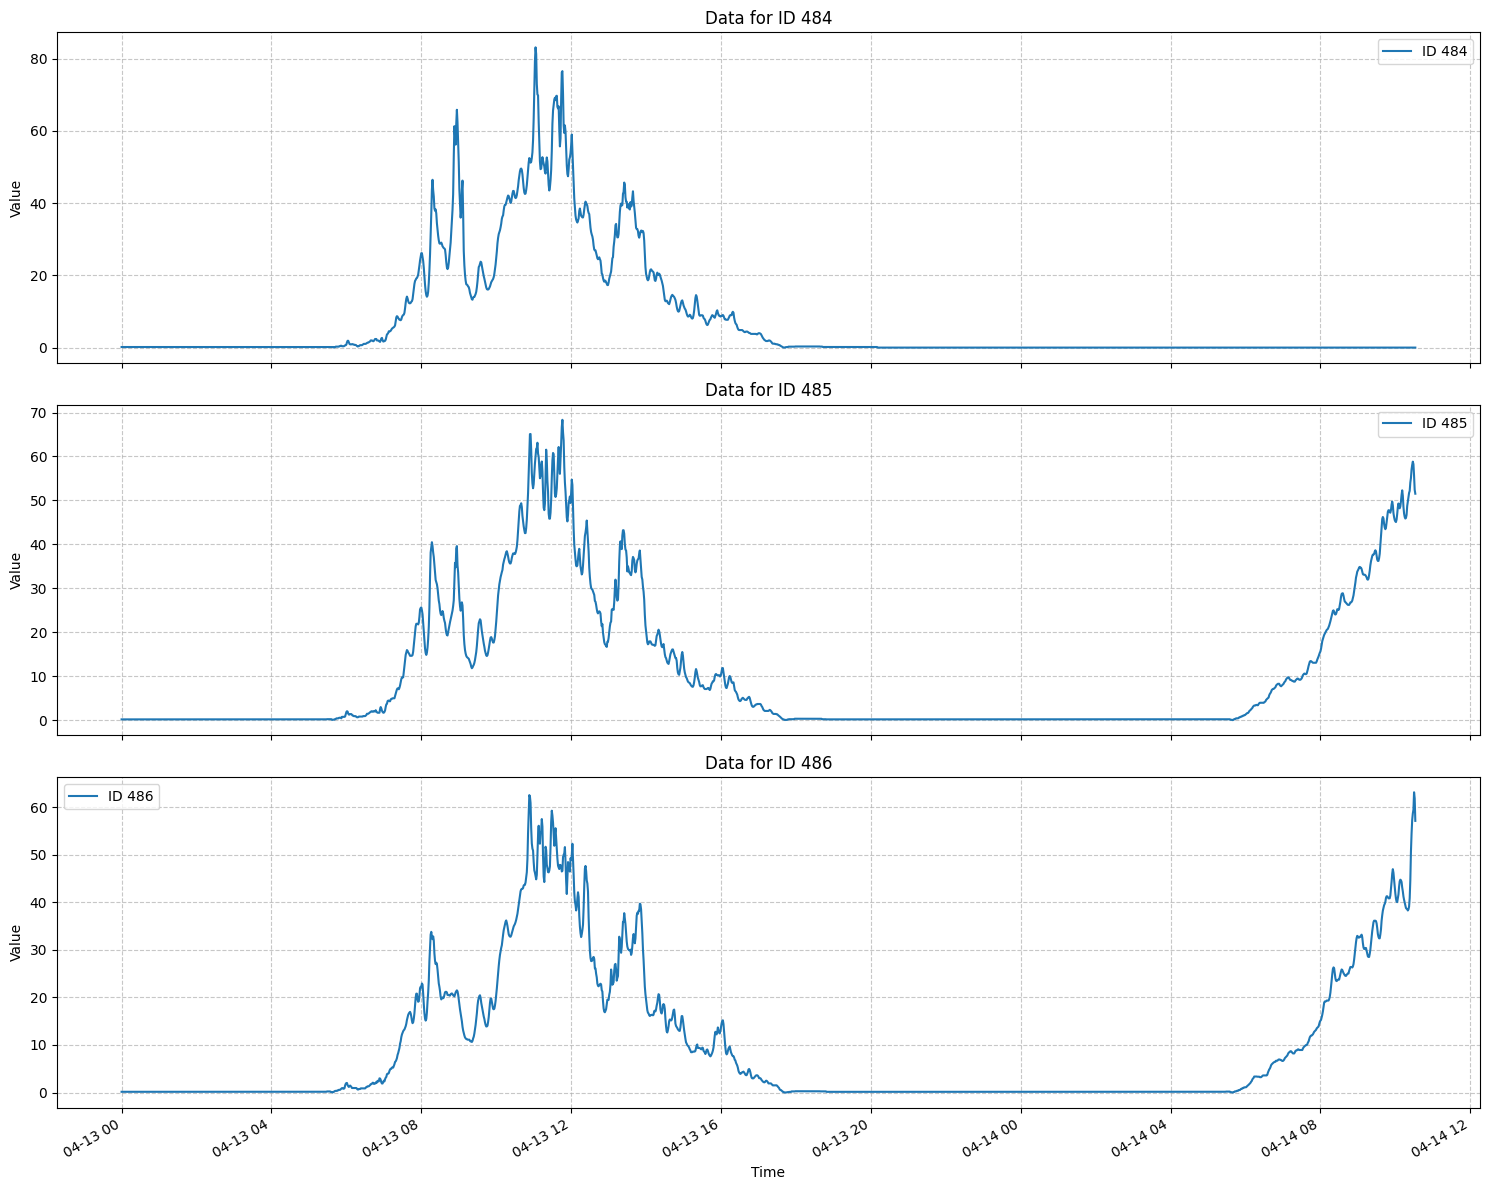

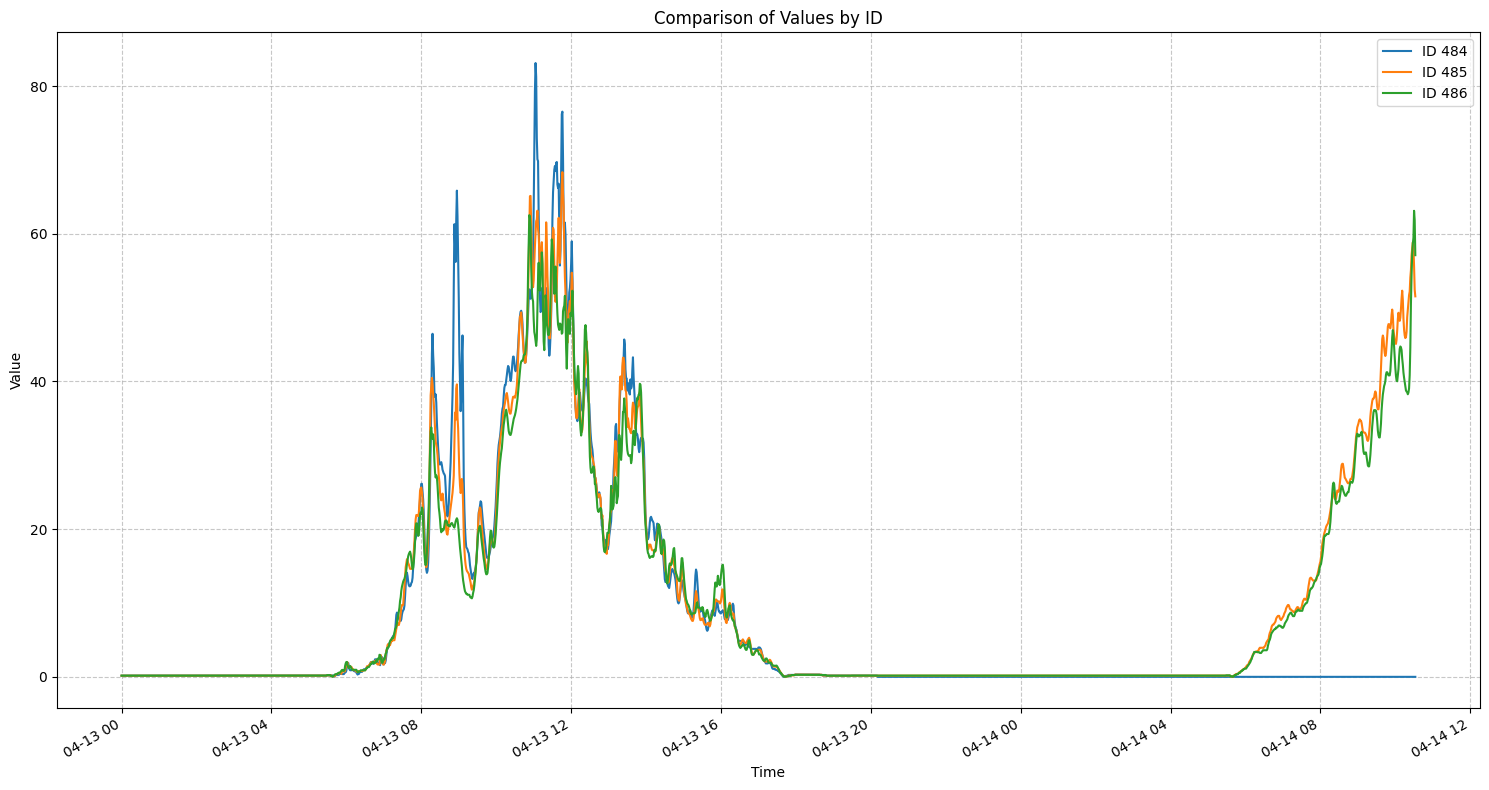

In [8]:
# Create a figure with 3 subplots (one for each ID in listID)
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

# Filter data for each ID and plot
for i, id_value in enumerate(listID):
    df_filtered = data[data['ID'] == id_value]
    
    # Plot the data
    axes[i].plot(df_filtered['Time'], df_filtered['VAL'], label=f'ID {id_value}')
    axes[i].set_title(f'Data for ID {id_value}')
    axes[i].set_ylabel('Value')
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].legend()

# Format x-axis to show clear time labels
plt.gcf().autofmt_xdate()
plt.xlabel('Time')
plt.tight_layout()
plt.show()

# Create a single plot with all IDs for comparison
plt.figure(figsize=(15, 8))
for id_value in listID:
    df_filtered = data[data['ID'] == id_value]
    plt.plot(df_filtered['Time'], df_filtered['VAL'], label=f'ID {id_value}')

plt.title('Comparison of Values by ID')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


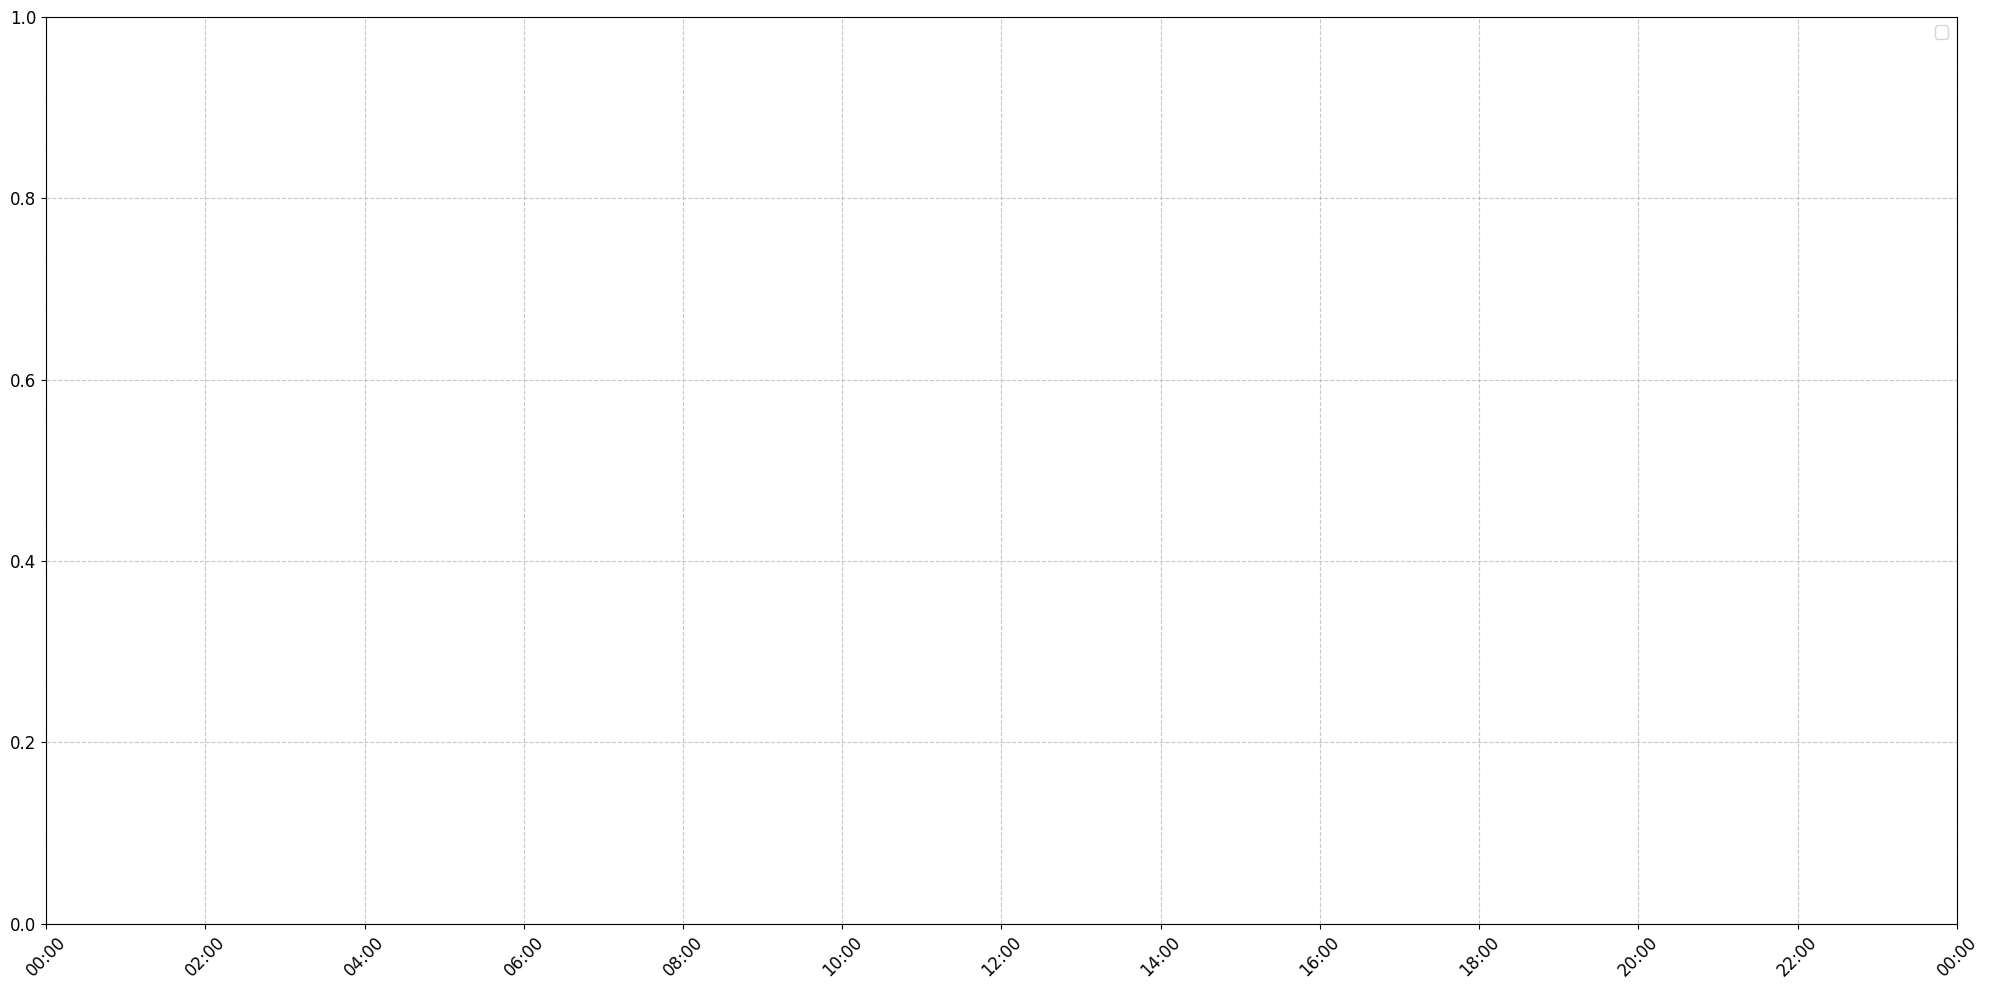

In [ ]:
import matplotlib.dates as mdates
sDate = datetime(2025,4,13,0,0,0)
eDate = datetime(2025,4,15,0,0,0)
listID = [484, 485, 486]

db = Database_Main()
data = pd.DataFrame(db.query(f"""
SELECT E.ID_NM, A.THOIDIEM_THUTHAP, A.GIATRI
FROM PDB_ADM.SCADA_DATA A
inner join PDB_ADM.SCADA_LK_KEY_DINHDANH B on B.ID_KEY=A.ID_KEY
inner join PDB_ADM.SCADA_DINHDANH C on C.ID_DINHDANH=B.ID_DINHDANH
inner join PDB_ADM.SCADA_LOAI_THUCTHE D on D.ID_LOAI_THUCTHE=C.ID_LOAI_THUCTHE
inner join HT_NHAMAY E on E.ID_NM = C.ID_THUCTHE
inner join TS_NHAMAY F on E.ID_NM = F.ID_NM
inner join PDB_ADM.SCADA_LOAI_TINHIEU G on G.ID_LOAI_TINHIEU=B.ID_LOAI_TINHIEU
where a.THOIDIEM_THUTHAP >= TO_DATE('{sDate.strftime('%d/%m/%Y %H:%M:%S')}','dd/mm/yyyy HH24:MI:SS') 
AND a.THOIDIEM_THUTHAP < TO_DATE('{eDate.strftime('%d/%m/%Y %H:%M:%S')}','dd/mm/yyyy HH24:MI:SS') 
AND D.ID_LOAI_THUCTHE=1 AND E.ID_NM in {tuple(listID)} AND B.NGAYKETTHUC IS NULL AND F.NGAYDONGDIEN IS NOT NULL and F.CS_COD > 0
AND b.ID_LOAI_TINHIEU IN (1) order by A.THOIDIEM_THUTHAP
"""), columns = ['ID','Time','VAL'])
data

# Vẽ data theo 2 hình với 2 ID khác nhau
fig, ax = plt.subplots(figsize=(20,10))

# data1 = data[data['ID']==536]
# data2 = data[data['ID']==539]

# # Vẽ đường cho từng dataset
# ax.plot(data1['Time'], data1['VAL'], label='Hòa Bình 5', linewidth=2)
# ax.plot(data2['Time'], data2['VAL'], label='Kosy Bạc Liêu', linewidth=2)

# Thêm grid
ax.grid(True, linestyle='--', alpha=0.7)

# Format trục x với interval 2 giờ
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Tùy chỉnh font size và labels
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Điều chỉnh layout để tránh cắt labels
plt.tight_layout()

plt.show()

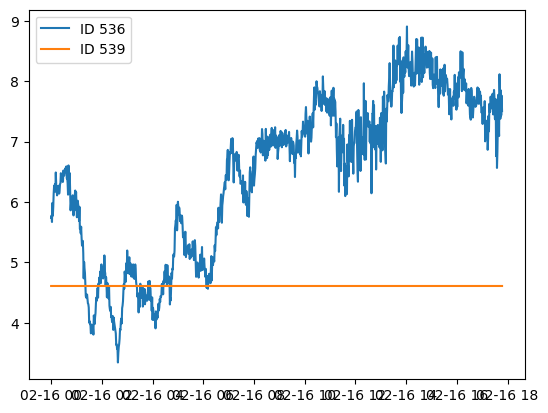

In [5]:
# Vẽ data theo 2 hình với 2 ID khác nhau
fig, ax = plt.subplots()
data1 = data[data['ID']==536]
data2 = data[data['ID']==539]
ax.plot(data1['Time'], data1['VAL'], label='ID 536')
ax.plot(data2['Time'], data2['VAL'], label='ID 539')
ax.legend()
plt.show()

In [ ]:
sDate = datetime(2023,10,23,0,0,0)
eDate = datetime(2023,10,28,0,0,0)
listID = [231, 220, 569]
db = Database_TTD()
data = pd.DataFrame(db.query(f"""
SELECT E.ID_NM, A.THOIDIEM_THUTHAP, A.GIATRI
FROM PDB_ADM.SCADA_DATA A
inner join PDB_ADM.SCADA_LK_KEY_DINHDANH B on B.ID_KEY=A.ID_KEY
inner join PDB_ADM.SCADA_DINHDANH C on C.ID_DINHDANH=B.ID_DINHDANH
inner join PDB_ADM.SCADA_LOAI_THUCTHE D on D.ID_LOAI_THUCTHE=C.ID_LOAI_THUCTHE
inner join HT_NHAMAY E on E.ID_NM = C.ID_THUCTHE
inner join TS_NHAMAY F on E.ID_NM = F.ID_NM
inner join PDB_ADM.SCADA_LOAI_TINHIEU G on G.ID_LOAI_TINHIEU=B.ID_LOAI_TINHIEU
where a.THOIDIEM_THUTHAP >= TO_DATE('{sDate.strftime('%d/%m/%Y %H:%M:%S')}','dd/mm/yyyy HH24:MI:SS') 
AND a.THOIDIEM_THUTHAP < TO_DATE('{eDate.strftime('%d/%m/%Y %H:%M:%S')}','dd/mm/yyyy HH24:MI:SS') 
AND D.ID_LOAI_THUCTHE=1 AND E.ID_NM in {tuple(listID)} AND B.NGAYKETTHUC IS NULL AND F.NGAYDONGDIEN IS NOT NULL and F.CS_COD > 0
AND b.ID_LOAI_TINHIEU IN (7) order by A.THOIDIEM_THUTHAP
"""), columns = ['ID','Time','VAL'])
data

In [ ]:
ngay=datetime(2023,12,25)
db=DB_PNLTT()
raw=db.query(f"""SELECT A.CHUKY, e.ID_NM, A.CONGSUAT_DIEUDO_DUBAO ,C.NGAY + (A.CHUKY-1)*15/24/60 AS THOIDIEM_THUTHAP 
            FROM  PDB_ADM.SMOV_RTP_DD_CONGBO_DB_NLTT_IAH A   
            INNER JOIN PDB_ADM.SMOV_RIS_DD_CONGBO_DB_NLTT_IAH B ON A.ID_RIS = B.ID_RIS   
            INNER JOIN PDB_ADM.SMOV_DONVI_NGAY C ON b.ID_DONVI_NGAY = c.ID_DONVI_NGAY   
            INNER JOIN  PDB_ADM.HT_DONVI d on C.UNITID = d.UNITID   
            INNER JOIN PDB_ADM.HT_NHAMAY e on d.ID_DV = e.ID_NM   
            WHERE B.TIMESTEP = 15 AND C.NGAY >= TO_DATE('{ngay.strftime('%m/%d/%Y')}','MM/DD/YYYY') AND C.NGAY < TO_DATE('{(ngay+timedelta(days=1)).strftime('%m/%d/%Y')}','MM/DD/YYYY') 
            and A.CHUKY = TO_NUMBER(TO_CHAR(SYSDATE,'HH24')) *4 + trunc(EXTRACT(MINUTE FROM SYSTIMESTAMP)/15) +1  AND d.ID_LOAIDV = 4 
            AND e.ID_NM=231
            ORDER BY THOIDIEM_THUTHAP
            """)
df_iah=pd.DataFrame.from_records(raw,columns=['ID_CHUKY','ID_NM','CONGSUAT_DIEUDO_DUBAO_IAH','THOIDIEM_THUTHAP'])

print(df_iah)
check_iah = df_iah['CONGSUAT_DIEUDO_DUBAO_IAH'].count()

In [ ]:
listID = [362, 381, 382, 374, 149, 526, 527, 545, 536,
        539, 533, 478, 571, 553, 556, 391, 2023, 519, 555, 
        521, 562, 755, 758, 784, 791, 794, 846, 1141, 870, 905, 
        1279, 917, 764, 808, 818, 830, 757, 789, 831, 1142, 1285, 903, 
        914, 753, 796, 819, 1132, 824, 829, 837, 849, 869, 876, 896, 1146, 
        1475, 872, 918, 761, 785, 801, 1229, 859, 1273, 1144, 915, 3782, 
        3783, 1251, 800, 855, 1564, 878, 901, 913, 919, 779, 788, 832, 
        833, 843, 866, 907, 1143, 909, 1145, 2698, 558, 275, 2011]

In [3]:
db = Database_Main()
data = pd.DataFrame(db.query(f"""
select A.ID_NM, A.CS_COD, B.TENTAT_NM E from 
PDB_ADM.TS_NHAMAY A INNER JOIN PDB_ADM.HT_NHAMAY B ON A.ID_NM = B.ID_NM
WHERE A.CS_COD IS NOT NULL AND A.CS_COD != 0
"""), columns = ['ID','CS_COD','TEN_NM'])
# data = pd.DataFrame(db.query(f"""
# select * from 
# PDB_ADM.TS_NHAMAY A INNER JOIN PDB_ADM.HT_NHAMAY B ON A.ID_NM = B.ID_NM
# WHERE A.CS_COD IS NOT NULL AND A.CS_COD > 30 
# """), columns = ['ID','CS_COD','TEN_NM'])
# # In ra DataFrame đã được sắp xếp lại
print(data)

       ID  CS_COD              TEN_NM
0     308   35.00       MT Phong Điền
1     309  151.95        ĐG Trung Nam
2     310   49.00         MT Krông Pa
3     301   28.80       ĐG Tây Nguyên
4     315   42.10         MT Srêpôk 1
..    ...     ...                 ...
244   573  100.00          ĐG Ia Le 1
245  2002   16.50          ĐG Ia Pech
246  2003   49.50        ĐG Ia Pech 2
247  2698   30.00  ĐG Số 20 Sóc Trăng
248  2917   28.80     ĐG Hướng Linh 3

[249 rows x 3 columns]


In [5]:
Sum = data['CS_COD'].sum()
Sum

14290.598999999998

In [7]:
data.to_csv('P:/7. User/NAMNVN/NM_NLTT.csv', index=False, encoding='utf-8-sig')

In [4]:
sDate = datetime(2023,10,23,0,0,0)
eDate = datetime(2023,10,28,0,0,0)
listID = [2026, 423, 424, 425]

# db = SQL_NLTT_NOIBO()
# data = pd.DataFrame.from_records(db.query(f"""
# select ID_NM, THOIDIEM_THUTHAP, NANGLUONG_SOCAP, CONGSUAT_THUCPHAT, CONGSUAT_KHOIPHUC from DB_NOIBO.dbo.NLTT_UOCTINH_CONGSUAT 
# where THOIDIEM_THOIDIEM between '{sDate.strftime('%Y-%m-%d')}' and '{sDate.strftime('%Y-%m-%d')}'
# and ID_NM in {tuple(listID)} order by THOIDIEM_THUTHAP 
# """), columns=['ID','Time','NLSC','P_real','P_uoc'])
db = Database_Main()
data = pd.DataFrame(db.query(f"""
select A.ID_NM, A.CS_COD, B.TEN_NM from 
        PDB_ADM.TS_NHAMAY A INNER JOIN PDB_ADM.HT_NHAMAY B ON A.ID_NM = B.ID_NM
        WHERE B.ID_NM in {tuple(listID)}
"""), columns = ['ID','CS_COD','TEN_NM'])
sorted_data = data[data['ID'].isin(listID)].sort_values(by='ID', key=lambda x: x.map({ID: i for i, ID in enumerate(listID)}))

# In ra DataFrame đã được sắp xếp lại
print(sorted_data)

     ID CS_COD                                    TEN_NM
3  2026   None  Nhà máy điện gió Tân Tấn Nhật - Đăk Glei
0   423   None        Tổng ĐMT Miền Bắc do Bx điều khiển
1   424   None      Tổng ĐMT Miền Trung do Bx điều khiển
2   425   None        Tổng ĐMT Miền Nam do Bx điều khiển


In [ ]:
db = DB_PNLTT()
# sDate = datetime(2023,10,23,0,0,0)
# eDate = datetime(2023,10,29,0,0,0)
data1 = pd.DataFrame(db.query(f"""SELECT e.ID_NM, e.ID_LOAIHINH, A.CONGSUAT_DONVI_DUBAO,A.CONGSUAT_DIEUDO_DUBAO ,A.CONGSUAT_COD ,
A.CONGSUAT_DONVI_DUBAO*A.CHONNGUON_DONVI + A.CONGSUAT_DIEUDO_DUBAO*(1- A.CHONNGUON_DONVI) AS CS_CHON
FROM  PDB_ADM.SMOV_RTP_DD_CONGBO_DB_NLTT_IAH A   
INNER JOIN PDB_ADM.SMOV_RIS_DD_CONGBO_DB_NLTT_IAH B ON A.ID_RIS = B.ID_RIS   
INNER JOIN PDB_ADM.SMOV_DONVI_NGAY C ON b.ID_DONVI_NGAY = c.ID_DONVI_NGAY   
INNER JOIN  PDB_ADM.HT_DONVI d on C.UNITID = d.UNITID   
INNER JOIN PDB_ADM.HT_NHAMAY e on d.ID_DV = e.ID_NM   
WHERE e.ID_NM in {tuple(listID)}
ORDER BY e.ID_NM"""), columns=['ID','Loại hình','CS DVDB','CS ĐĐDB','CS COD','CSDBDLC'])
data1

In [3]:
# Database connection
db = DB_PNLTT()

sDate = datetime(2025,3,1)
eDate = datetime(2025,3,2)

# Query the database with grouping by time
data1 = pd.DataFrame(db.query(f"""SELECT 
    C.NGAY + (A.CHUKY-1)*15/24/60 AS THOIDIEM_THUTHAP,
    'All' as Ten_NM,
    SUM(A.CONGSUAT_DONVI_DUBAO) as CS_DVDB,
    SUM(A.CONGSUAT_DIEUDO_DUBAO) as CS_DDDB,
    SUM(A.CONGSUAT_DONVI_DUBAO*A.CHONNGUON_DONVI + A.CONGSUAT_DIEUDO_DUBAO*(1- A.CHONNGUON_DONVI)) as CSDBDLC
FROM PDB_ADM.SMOV_RTP_DD_CONGBO_DB_NLTT_IAH A   
INNER JOIN PDB_ADM.SMOV_RIS_DD_CONGBO_DB_NLTT_IAH B ON A.ID_RIS = B.ID_RIS   
INNER JOIN PDB_ADM.SMOV_DONVI_NGAY C ON b.ID_DONVI_NGAY = c.ID_DONVI_NGAY   
INNER JOIN PDB_ADM.HT_DONVI d on C.UNITID = d.UNITID   
INNER JOIN PDB_ADM.HT_NHAMAY e on d.ID_DV = e.ID_NM
WHERE B.TIMESTEP = 15 
AND C.NGAY >= TO_DATE('{sDate.strftime('%Y/%m/%d')}','YYYY/MM/DD') 
AND C.NGAY <= TO_DATE('{eDate.strftime('%Y/%m/%d')}','YYYY/MM/DD')
GROUP BY C.NGAY + (A.CHUKY-1)*15/24/60
ORDER BY THOIDIEM_THUTHAP"""), columns=['Time','Ten_NM','CS DVDB','CS ĐĐDB','CSDBDLC'])
data1

Time Ten_NM   CS DVDB   CS ĐĐDB   CSDBDLC
0  2025-03-01 00:00:00    All  2025.561  2074.437  2056.809
1  2025-03-01 00:15:00    All  2041.285  2052.262  2036.286
2  2025-03-01 00:30:00    All  2015.849  2032.612  2016.600
3  2025-03-01 00:45:00    All  2004.970  2032.628  2016.603
4  2025-03-01 01:00:00    All  2009.573  2014.591  1999.198
5  2025-03-01 01:15:00    All  1997.108  2002.550  1987.660
6  2025-03-01 01:30:00    All  1979.756  1976.121  1961.303
7  2025-03-01 01:45:00    All  1977.467  1953.663  1938.914
8  2025-03-01 02:00:00    All  1970.549  1929.769  1915.094
9  2025-03-01 02:15:00    All  1954.931  1903.790  1889.190
10 2025-03-01 02:30:00    All  1941.087  1879.260  1864.734
11 2025-03-01 02:45:00    All  1938.480  1855.931  1841.471
12 2025-03-01 03:00:00    All  1928.346  1830.389  1816.019
13 2025-03-01 03:15:00    All  1932.179  1807.442  1793.184
14 2025-03-01 03:30:00    All  1912.959  1780.701  1766.539
15 2025-03-01 03:45:00    All  1919.891       NaN       NaN

In [ ]:
import os
import re
import pandas as pd
from pandas import ExcelWriter
from datetime import datetime

# Function to sanitize file names
def sanitize(filename):
    return re.sub(r'[\\/*?:"<>|]', "", filename)

# Database connection
db = DB_PNLTT()

# List of IDs and dates
listID = [358, 483, 459, 409, 393, 427, 497, 550, 546, 394, 371, 351, 353, 354, 355, 356, 362]
sDate = datetime(2024,1,15)
eDate = datetime(2024,1,20)

# Query the database
data1 = pd.DataFrame(db.query(f"""SELECT C.NGAY + (A.CHUKY-1)*15/24/60 AS THOIDIEM_THUTHAP, e.ID_NM, e.TEN_NM, A.CONGSUAT_DONVI_DUBAO,A.CONGSUAT_DIEUDO_DUBAO,
A.CONGSUAT_DONVI_DUBAO*A.CHONNGUON_DONVI + A.CONGSUAT_DIEUDO_DUBAO*(1- A.CHONNGUON_DONVI) AS CS_CHON
FROM  PDB_ADM.SMOV_RTP_DD_CONGBO_DB_NLTT_IAH A   
INNER JOIN PDB_ADM.SMOV_RIS_DD_CONGBO_DB_NLTT_IAH B ON A.ID_RIS = B.ID_RIS   
INNER JOIN PDB_ADM.SMOV_DONVI_NGAY C ON b.ID_DONVI_NGAY = c.ID_DONVI_NGAY   
INNER JOIN  PDB_ADM.HT_DONVI d on C.UNITID = d.UNITID   
INNER JOIN PDB_ADM.HT_NHAMAY e on d.ID_DV = e.ID_NM
WHERE B.TIMESTEP = 15 AND C.NGAY >= TO_DATE('{sDate.strftime('%Y/%m/%d')}','YYYY/MM/DD') AND 
C.NGAY <= TO_DATE('{eDate.strftime('%Y/%m/%d')}','YYYY/MM/DD') 
AND e.ID_NM in {tuple(listID)}
ORDER BY e.ID_NM"""), columns=['Time','ID','Ten_NM','CS DVDB','CS ĐĐDB','CSDBDLC'])

# Round the values in the specified columns to 2 decimal places
data1[['CS DVDB', 'CS ĐĐDB', 'CSDBDLC']] = data1[['CS DVDB', 'CS ĐĐDB', 'CSDBDLC']].round(2)

# Convert 'Time' column to datetime format
data1['Time'] = pd.to_datetime(data1['Time'])

# Create new columns for date and time of day
data1.insert(1, 'Date', data1['Time'].dt.strftime('%d-%m-%Y'))
data1.insert(2, 'TimeOfDay', data1['Time'].dt.time)

# Write each group to a separate Excel file
for id, group in data1.groupby('ID'):
    sanitized_id = sanitize(str(id))
    with ExcelWriter(f'C:/Users/namnvn/Downloads/New folder/{sanitized_id}.xlsx') as writer:
        group.to_excel(writer, index=False)

In [3]:
import os
import re
import pandas as pd
from pandas import ExcelWriter
from datetime import datetime

# Function to sanitize file names
def sanitize(filename):
    return re.sub(r'[\\/*?:"<>|]', "", filename)

# Database connection
db = DB_PNLTT()

# List of IDs and dates
listID = [484, 485, 486]
sDate = datetime(2025,4,13)
eDate = datetime(2025,4,15)

# Query the database
data1 = pd.DataFrame(db.query(f"""SELECT C.NGAY + (A.CHUKY-1)*15/24/60 AS THOIDIEM_THUTHAP, e.ID_NM, e.TEN_NM, A.CONGSUAT_DONVI_DUBAO,A.CONGSUAT_DIEUDO_DUBAO,
A.CONGSUAT_DONVI_DUBAO*A.CHONNGUON_DONVI + A.CONGSUAT_DIEUDO_DUBAO*(1- A.CHONNGUON_DONVI) AS CS_CHON
FROM  PDB_ADM.SMOV_RTP_DD_CONGBO_DB_NLTT_IAH A   
INNER JOIN PDB_ADM.SMOV_RIS_DD_CONGBO_DB_NLTT_IAH B ON A.ID_RIS = B.ID_RIS   
INNER JOIN PDB_ADM.SMOV_DONVI_NGAY C ON b.ID_DONVI_NGAY = c.ID_DONVI_NGAY   
INNER JOIN  PDB_ADM.HT_DONVI d on C.UNITID = d.UNITID   
INNER JOIN PDB_ADM.HT_NHAMAY e on d.ID_DV = e.ID_NM
WHERE B.TIMESTEP = 15 AND C.NGAY >= TO_DATE('{sDate.strftime('%Y/%m/%d')}','YYYY/MM/DD') AND 
C.NGAY <= TO_DATE('{eDate.strftime('%Y/%m/%d')}','YYYY/MM/DD') 
AND e.ID_NM = 469
ORDER BY e.ID_NM"""), columns=['Time','ID','Ten_NM','CS DVDB','CS ĐĐDB','CSDBDLC'])

# Round the values in the specified columns to 2 decimal places
data1[['CS DVDB', 'CS ĐĐDB', 'CSDBDLC']] = data1[['CS DVDB', 'CS ĐĐDB', 'CSDBDLC']].round(2)

# Convert 'Time' column to datetime format
data1['Time'] = pd.to_datetime(data1['Time'])

# Create new columns for date and time of day
data1.insert(1, 'Date', data1['Time'].dt.strftime('%d-%m-%Y'))
data1.insert(2, 'TimeOfDay', data1['Time'].dt.time)
print(data1)
# Write each group to a separate Excel file
for id, group in data1.groupby('ID'):
    sanitized_id = sanitize(str(id))
    with ExcelWriter(f'C:/Users/namnvn/Downloads/New folder/{sanitized_id}.xlsx') as writer:
        group.to_excel(writer, index=False)

                   Time        Date TimeOfDay   ID  \
0   2025-04-13 00:00:00  13-04-2025  00:00:00  469   
1   2025-04-13 00:15:00  13-04-2025  00:15:00  469   
2   2025-04-13 00:30:00  13-04-2025  00:30:00  469   
3   2025-04-13 00:45:00  13-04-2025  00:45:00  469   
4   2025-04-13 01:00:00  13-04-2025  01:00:00  469   
..                  ...         ...       ...  ...   
149 2025-04-14 13:15:00  14-04-2025  13:15:00  469   
150 2025-04-14 13:30:00  14-04-2025  13:30:00  469   
151 2025-04-14 13:45:00  14-04-2025  13:45:00  469   
152 2025-04-14 14:00:00  14-04-2025  14:00:00  469   
153 2025-04-14 14:15:00  14-04-2025  14:15:00  469   

                                        Ten_NM  CS DVDB  CS ĐĐDB  CSDBDLC  
0    Nhà máy điện mặt trời Trung Nam Thuận Nam     0.00     0.00     0.00  
1    Nhà máy điện mặt trời Trung Nam Thuận Nam     0.00     0.00     0.00  
2    Nhà máy điện mặt trời Trung Nam Thuận Nam     0.00     0.00     0.00  
3    Nhà máy điện mặt trời Trung Nam Thuận Nam 

In [ ]:
###LẤY CÔNG SUẤT ƯỚC, THỰC PHÁT

# Assuming 'df' is your DataFrame
# Assuming 'df' is your DataFrame
data2[['P_real','P_uoc', 'NLSC']] = data2[['P_real','P_uoc', 'NLSC']].round(2)

# Fill NaN or null values in 'NLSC' column with 0
data2['NLSC'] = data2['NLSC'].fillna(0)

# Convert 'Time' column to datetime
data2['Time'] = pd.to_datetime(data2['Time'])

# Select only the rows where the minute is 00, 15, 30, or 45
data2 = data2[data2['Time'].dt.minute.isin([0, 15, 30, 45])]

# Select only the rows where the minute is 00, 15, 30, or 45
data2 = data2[data2['Time'].dt.minute.isin([0, 15, 30, 45])]

def sanitize(filename):
    return re.sub(r'[\\/*?:"<>|]', "", filename)

base_dir = 'C:/Users/namnvn/Downloads/New folder (2)/'

for id, group in data2.groupby('ID'):
    sanitized_id = sanitize(str(id))
    file_path = os.path.join(base_dir, f'{sanitized_id}.xlsx')
    
    with ExcelWriter(file_path) as writer:
        group.to_excel(writer, index=False)

In [32]:
import os
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import Font, Color, Alignment, Border, Side, PatternFill

# Directories
dir1 = 'C:/Users/namnvn/Downloads/New folder/'
dir2 = 'C:/Users/namnvn/Downloads/New folder (2)/'
merged_dir = 'C:/Users/namnvn/Downloads/Merged/'

# Create the 'Merged' directory if it does not exist
os.makedirs(merged_dir, exist_ok=True)

# Get list of all Excel files in both directories
files1 = [f for f in os.listdir(dir1) if f.endswith('.xlsx')]
files2 = [f for f in os.listdir(dir2) if f.endswith('.xlsx')]

# Get unique file names
unique_files = set(files1 + files2)

# Create a Pandas Excel writer using XlsxWriter as the engine.
merged_file_path = os.path.join(merged_dir, 'merged_data.xlsx')
with pd.ExcelWriter(merged_file_path, engine='openpyxl') as writer:
    # For each unique file name
    for file in unique_files:
        # Initialize a list to store data
        dfs = []
        
        # If file exists in dir1, read and append to dfs
        if file in files1:
            df1 = pd.read_excel(os.path.join(dir1, file))
            dfs.append(df1)
        
        # If file exists in dir2, read and append to dfs
        if file in files2:
            df2 = pd.read_excel(os.path.join(dir2, file))
            dfs.append(df2)
        
        # Merge all DataFrames in the list on 'Time'
        df = pd.merge(dfs[0], dfs[1], on='Time', how='inner')
        
        # If 'ID_y' or 'ID_x' column exists, drop it
        if 'ID_y' in df.columns:
            df = df.drop(columns='ID_y')
        if 'ID_x' in df.columns:
            df = df.drop(columns='ID_x')
        
        # Get the file name without the extension
        file_name_without_extension = os.path.splitext(file)[0]
        
        # Write DataFrame to an Excel sheet named 'file_name_without_extension'
        df.to_excel(writer, sheet_name=file_name_without_extension, index=False)

# Load the workbook
book = load_workbook(merged_file_path)

# Loop through each sheet in the workbook
for sheet in book.sheetnames:
    ws = book[sheet]

    # Apply formatting to the header row
    for cell in ws[1]:
        cell.font = Font(bold=True)
        cell.fill = PatternFill(start_color="00FF00", end_color="00FF00", fill_type = "solid")
        cell.border = Border(left=Side(border_style='thin'), 
                             right=Side(border_style='thin'), 
                             top=Side(border_style='thin'), 
                             bottom=Side(border_style='thin'))
        cell.alignment = Alignment(horizontal='center', vertical='center')

    # Adjust column widths
    for column in ws.columns:
        max_length = 0
        column = [cell for cell in column]
        for cell in column:
            try:
                if len(str(cell.value)) > max_length:
                    max_length = len(cell.value)
            except:
                pass
        adjusted_width = (max_length + 2)
        ws.column_dimensions[column[0].column_letter].width = adjusted_width

# Save the workbook
book.save(merged_file_path)

In [33]:
df = pd.read_excel('C:/Users/namnvn/Downloads/Merged/merged_data.xlsx', sheet_name='469')
df_new = df.loc[(df['P_real'] == df['P_uoc']) & (df['NLSC'] > 600)]
# Assuming 'df_new' is your DataFrame
with pd.ExcelWriter(merged_file_path, engine='openpyxl', mode='a') as writer:
    df_new.to_excel(writer, sheet_name='Puoc=Preal', index=False)

In [88]:
###NỐI 2 FILE EXCEL Ở TRÊN THÀNH 1 FILE
# Directories
dir1 = 'C:/Users/namnvn/Downloads/New folder/'
dir2 = 'C:/Users/namnvn/Downloads/New folder (2)/'
merged_dir = 'C:/Users/namnvn/Downloads/Merged/'

# Create the 'Merged' directory if it does not exist
os.makedirs(merged_dir, exist_ok=True)

# Get list of all Excel files in both directories
files1 = [f for f in os.listdir(dir1) if f.endswith('.xlsx')]
files2 = [f for f in os.listdir(dir2) if f.endswith('.xlsx')]

# Get unique file names
unique_files = set(files1 + files2)

# For each unique file name
# For each unique file name
for file in unique_files:
    # Initialize a list to store data
    dfs = []
    
    # If file exists in dir1, read and append to dfs
    if file in files1:
        df1 = pd.read_excel(os.path.join(dir1, file))
        dfs.append(df1)
    
    # If file exists in dir2, read and append to dfs
    if file in files2:
        df2 = pd.read_excel(os.path.join(dir2, file))
        dfs.append(df2)
    
    # Merge all DataFrames in the list on 'Time'
    df = pd.merge(dfs[0], dfs[1], on='Time', how='inner')
    
    # Save the merged DataFrame to a new Excel file
    df.to_excel(os.path.join(merged_dir, file), index=False)

# Get list of all Excel files in the 'Merged' directory
merged_files = [f for f in os.listdir(merged_dir) if f.endswith('.xlsx')]

# For each file in the 'Merged' directory
for file in merged_files:
    # Read the file into a DataFrame
    df = pd.read_excel(os.path.join(merged_dir, file))
    
    # If 'ID_y' column exists, drop it
    if 'ID_y' in df.columns:
        df = df.drop(columns='ID_y')
    
    # Save the DataFrame back to the file
    df.to_excel(os.path.join(merged_dir, file), index=False)

In [8]:
###LẤY SẢN LƯỢNG ƯỚC TỪ P_UOC
# Initialize database connection
db = SQL_NLTT_NOIBO()

# Define list of IDs and dates
listID = [347, 317, 348, 372, 399, 409, 413, 460, 479, 508, 514, 583, 458, 2000, 414]
sDate = datetime(2024,1,1)
eDate = datetime(2024,1,19)

def calculate_daily_sum(data):
    # Convert 'Time' column to datetime
    data['Time'] = pd.to_datetime(data['Time'])
    
    # Set 'Time' as the index
    data.set_index('Time', inplace=True)
    
    # Resample data to 15-minute intervals and calculate the mean for each interval
    data_resampled = data.resample('15T').mean()
    
    # Group the resampled data by day and calculate the sum
    daily_sum = data_resampled.groupby(data_resampled.index.date).agg({
        'P_uoc': 'sum'
    }) / 4  # Divide by 4 to get the daily total
    
    # Reset the index
    daily_sum.reset_index(inplace=True)
    return daily_sum

# Convert list of IDs to string format
id_str = ', '.join(map(str, listID))

data2 = pd.DataFrame.from_records(db.query(f"""
select ID_NM, THOIDIEM_THUTHAP, CONGSUAT_KHOIPHUC from DB_NOIBO.dbo.NLTT_UOCTINH_CONGSUAT 
where THOIDIEM_THUTHAP between '{sDate.strftime('%Y-%m-%d')}' and '{eDate.strftime('%Y-%m-%d')}'
and ID_NM IN ({id_str}) order by THOIDIEM_THUTHAP 
"""), columns=['ID','Time','P_uoc'])
data2

# Define the output directory
output_dir = "C:/Users/namnvn/Downloads/New folder (4)"

# Get unique IDs
unique_ids = data2['ID'].unique()

# Loop through each unique ID
for id in unique_ids:
    # Filter data for the current ID
    data_filtered = data2[data2['ID'] == id]

    # Apply the function to data_filtered
    data_daily = calculate_daily_sum(data_filtered)

    # Define the output file path
    output_file_path = os.path.join(output_dir, f"{id}.csv")

    # Export the data to a CSV file
    data_daily.to_csv(output_file_path, index=False)

    # Display the result
    print(f"Daily sum for ID {id} has been saved to {output_file_path}")

ID       Time      P_uoc
0        317 2024-01-01   0.000000
1        347 2024-01-01   0.000000
2        348 2024-01-01   0.000000
3        372 2024-01-01   0.000000
4        399 2024-01-01   0.000000
...      ...        ...        ...
388435   479 2024-01-19   0.000000
388436   508 2024-01-19   5.465351
388437   514 2024-01-19  10.522464
388438   583 2024-01-19   0.267809
388439  2000 2024-01-19   1.300000

[388440 rows x 3 columns]

In [16]:
###LẤY SẢN LƯỢNG THỰC TỪ BCSX
db = Database_Main()
listID = [347, 317, 348, 372, 399, 409, 413, 460, 479, 508, 514, 583, 458, 2000, 414]
sDate = datetime(2024,1,1)
eDate = datetime(2024,1,19)
data3 = pd.DataFrame(db.query(f"""
SELECT B.NGAY_VANHANH, A.ID_NM, C.SANLUONG_NGAY
FROM PDB_BCSX.BCSX_IN_LK_NHAMAY A
INNER JOIN PDB_BCSX.BCSX_NGAY B ON B.ID_BCSX  = A.ID_BCSX 
INNER JOIN PDB_BCSX.BCSX_OUT_DATA_NHAMAYDIEN C ON C.ID_LK_NMD = A.ID_LK 
WHERE A.ID_NM in {tuple(listID)}
AND B.NGAY_VANHANH between TO_DATE('2024-01-01', 'YYYY-MM-DD') and TO_DATE('2024-01-19', 'YYYY-MM-DD')
Order by A.ID_NM 
"""), columns=['Time','ID','A_thuc'])
data3['Time'] = pd.to_datetime(data3['Time'])
data3 = data3.sort_values('Time')

# Giả sử data3 là DataFrame của bạn
# Và path là đường dẫn bạn muốn lưu file
path = 'C:/Users/namnvn/Downloads/New folder (3)'

# Xóa các hàng lặp lại dựa trên tất cả các cột
data3 = data3.drop_duplicates()

# Group data by ID and Time, and calculate the sum of A_thuc for each group
data3_grouped = data3.groupby(['ID', 'Time'])['A_thuc'].sum().reset_index()

for id, group in data3_grouped.groupby('ID'):
    group.to_csv(f'{path}/{id}.csv', index=False)

# Giả sử data3 là DataFrame của bạn
# Và path là đường dẫn bạn muốn lưu file
path = 'C:/Users/namnvn/Downloads/New folder (3)'
for id, group in data3.groupby('ID'):
    group.to_csv(f'{path}/{id}.csv', index=False)

In [26]:
###GHÉP 2 FILE EXCEL TRÊN THÀNH 1 FILE

# Đường dẫn đến thư mục 3 và 4
folder3 = 'C:/Users/namnvn/Downloads/New folder (3)'
folder4 = 'C:/Users/namnvn/Downloads/New folder (4)'

# Lấy danh sách tên file trong mỗi thư mục
files3 = os.listdir(folder3)
files4 = os.listdir(folder4)

# Tìm các file có tên giống nhau trong cả hai thư mục
common_files = set(files3) & set(files4)

# Ghép cột P_uoc từ các file có tên giống nhau
for file in common_files:
    # Đọc dữ liệu từ mỗi file
    df3 = pd.read_csv(os.path.join(folder3, file))
    df4 = pd.read_csv(os.path.join(folder4, file))

    # Ghép cột P_uoc từ df4 vào df3
    df3['P_uoc'] = df4['P_uoc']
    df3 = df3.reindex(columns=['Time', 'ID', 'A_thuc', 'P_uoc'])

    # Đổi tên cột
    df3 = df3.rename(columns={'Time': 'time', 'ID': 'ID_NM', 'A_thuc': 'A_thuc', 'P_uoc': 'A_uoc'})
    # Tách tên file và phần mở rộng
    filename, _ = os.path.splitext(file)

    # Lưu DataFrame đã ghép vào một file Excel mới
    df3.to_excel(f'C:/Users/namnvn/Downloads/merged (2)/{filename}.xlsx', index=False)


                   Time  ID_x                              Ten_NM  CS DVDB  \
0   2024-01-15 00:00:00   358  Nhà máy điện mặt trời Thuận Nam 19      0.0   
1   2024-01-15 00:15:00   358  Nhà máy điện mặt trời Thuận Nam 19      0.0   
2   2024-01-15 00:30:00   358  Nhà máy điện mặt trời Thuận Nam 19      0.0   
3   2024-01-15 00:45:00   358  Nhà máy điện mặt trời Thuận Nam 19      0.0   
4   2024-01-15 01:00:00   358  Nhà máy điện mặt trời Thuận Nam 19      0.0   
..                  ...   ...                                 ...      ...   
380 2024-01-18 23:00:00   358  Nhà máy điện mặt trời Thuận Nam 19      0.0   
381 2024-01-18 23:15:00   358  Nhà máy điện mặt trời Thuận Nam 19      0.0   
382 2024-01-18 23:30:00   358  Nhà máy điện mặt trời Thuận Nam 19      0.0   
383 2024-01-18 23:45:00   358  Nhà máy điện mặt trời Thuận Nam 19      0.0   
384 2024-01-19 00:00:00   358  Nhà máy điện mặt trời Thuận Nam 19      0.0   

     CS ĐĐDB  CSDBDLC    P_real  P_uoc  
0        0.0      0.0 

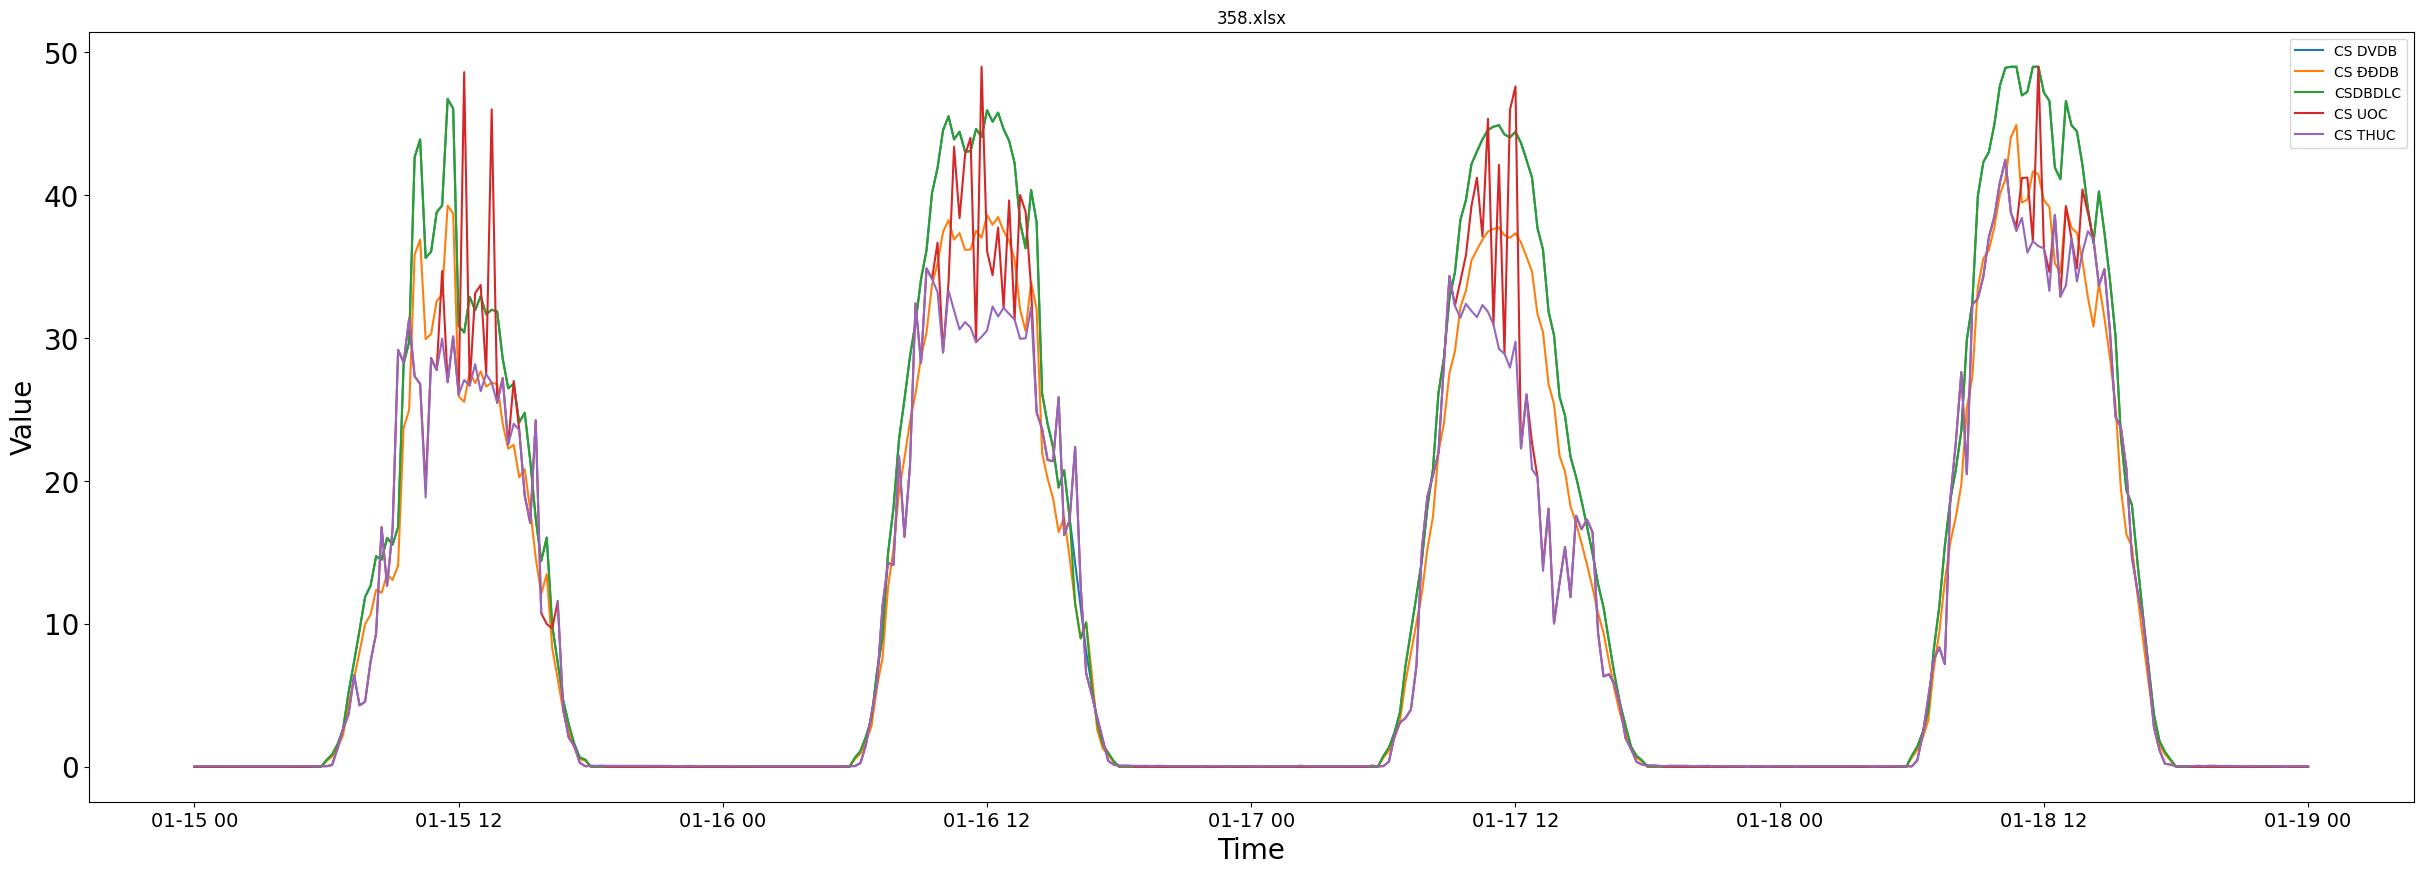

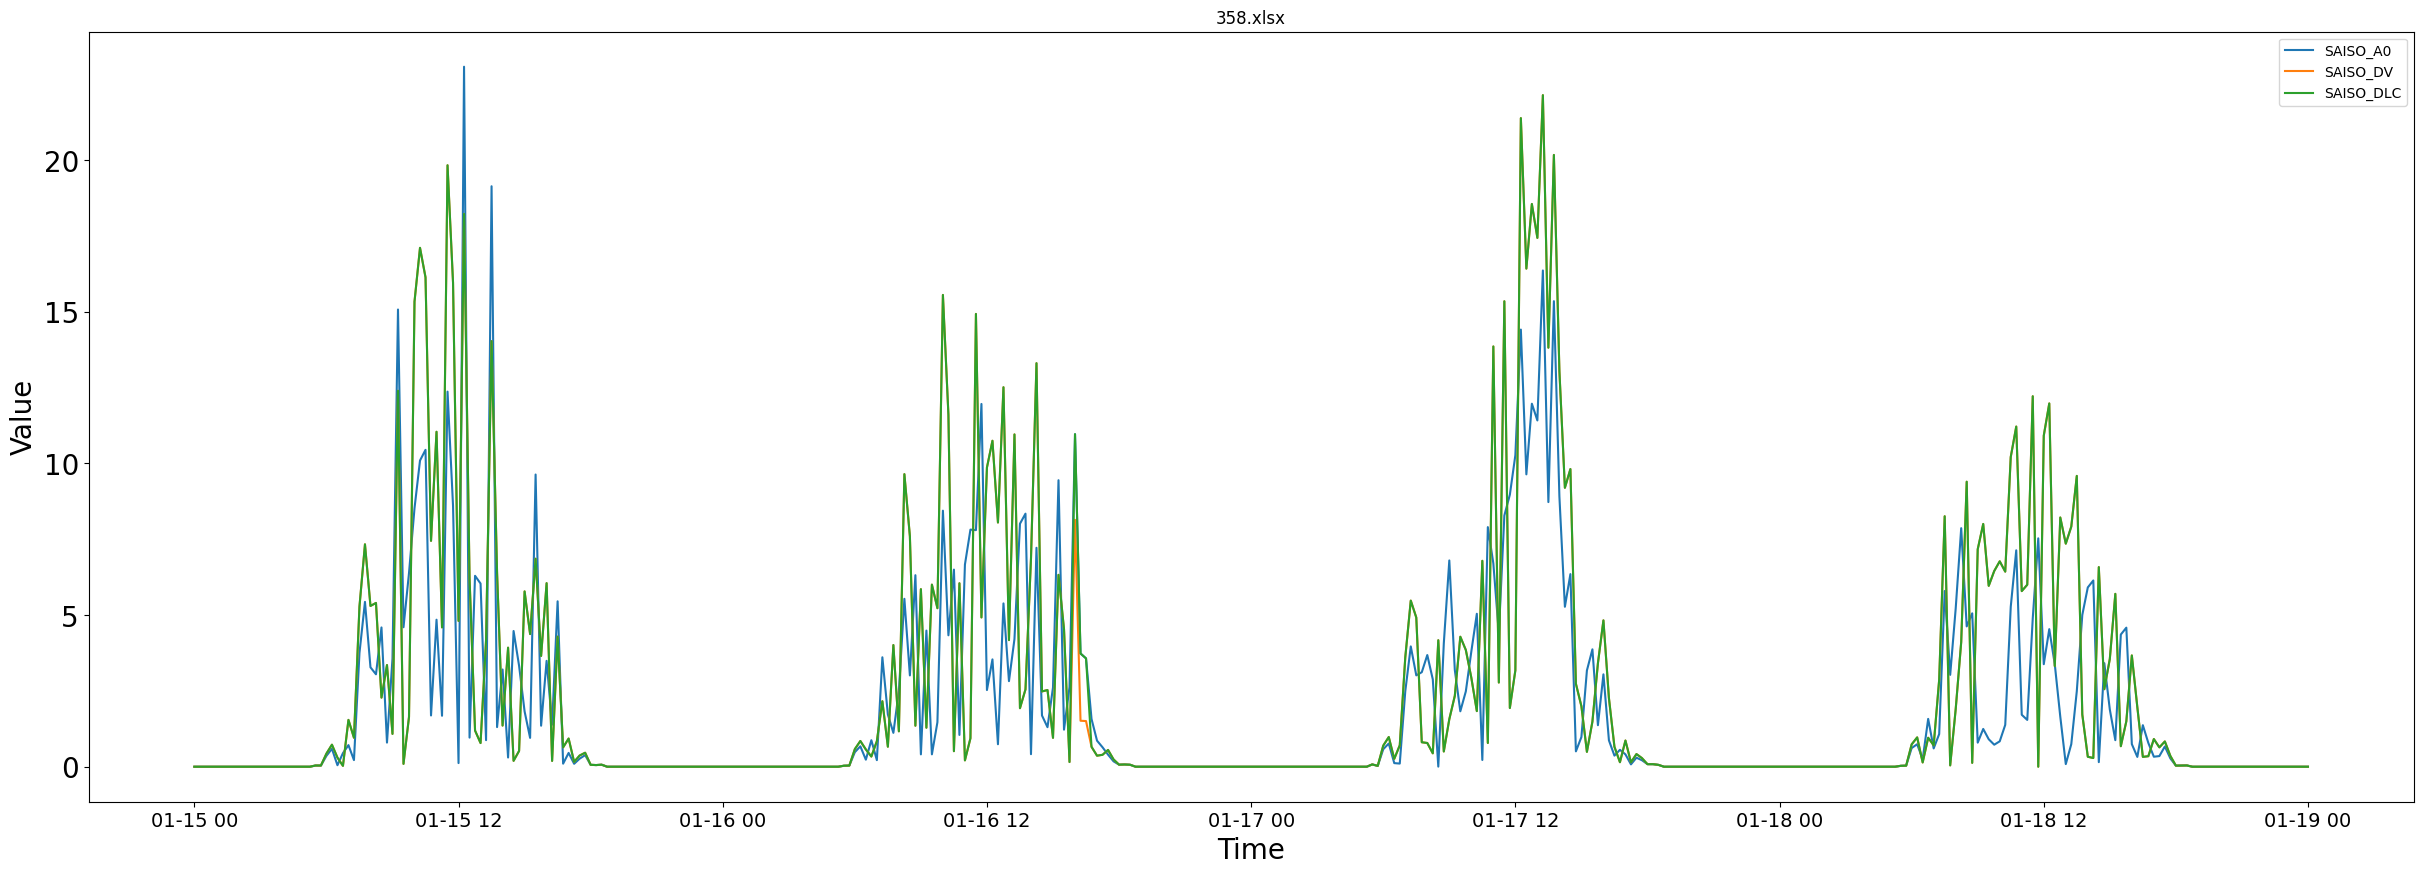

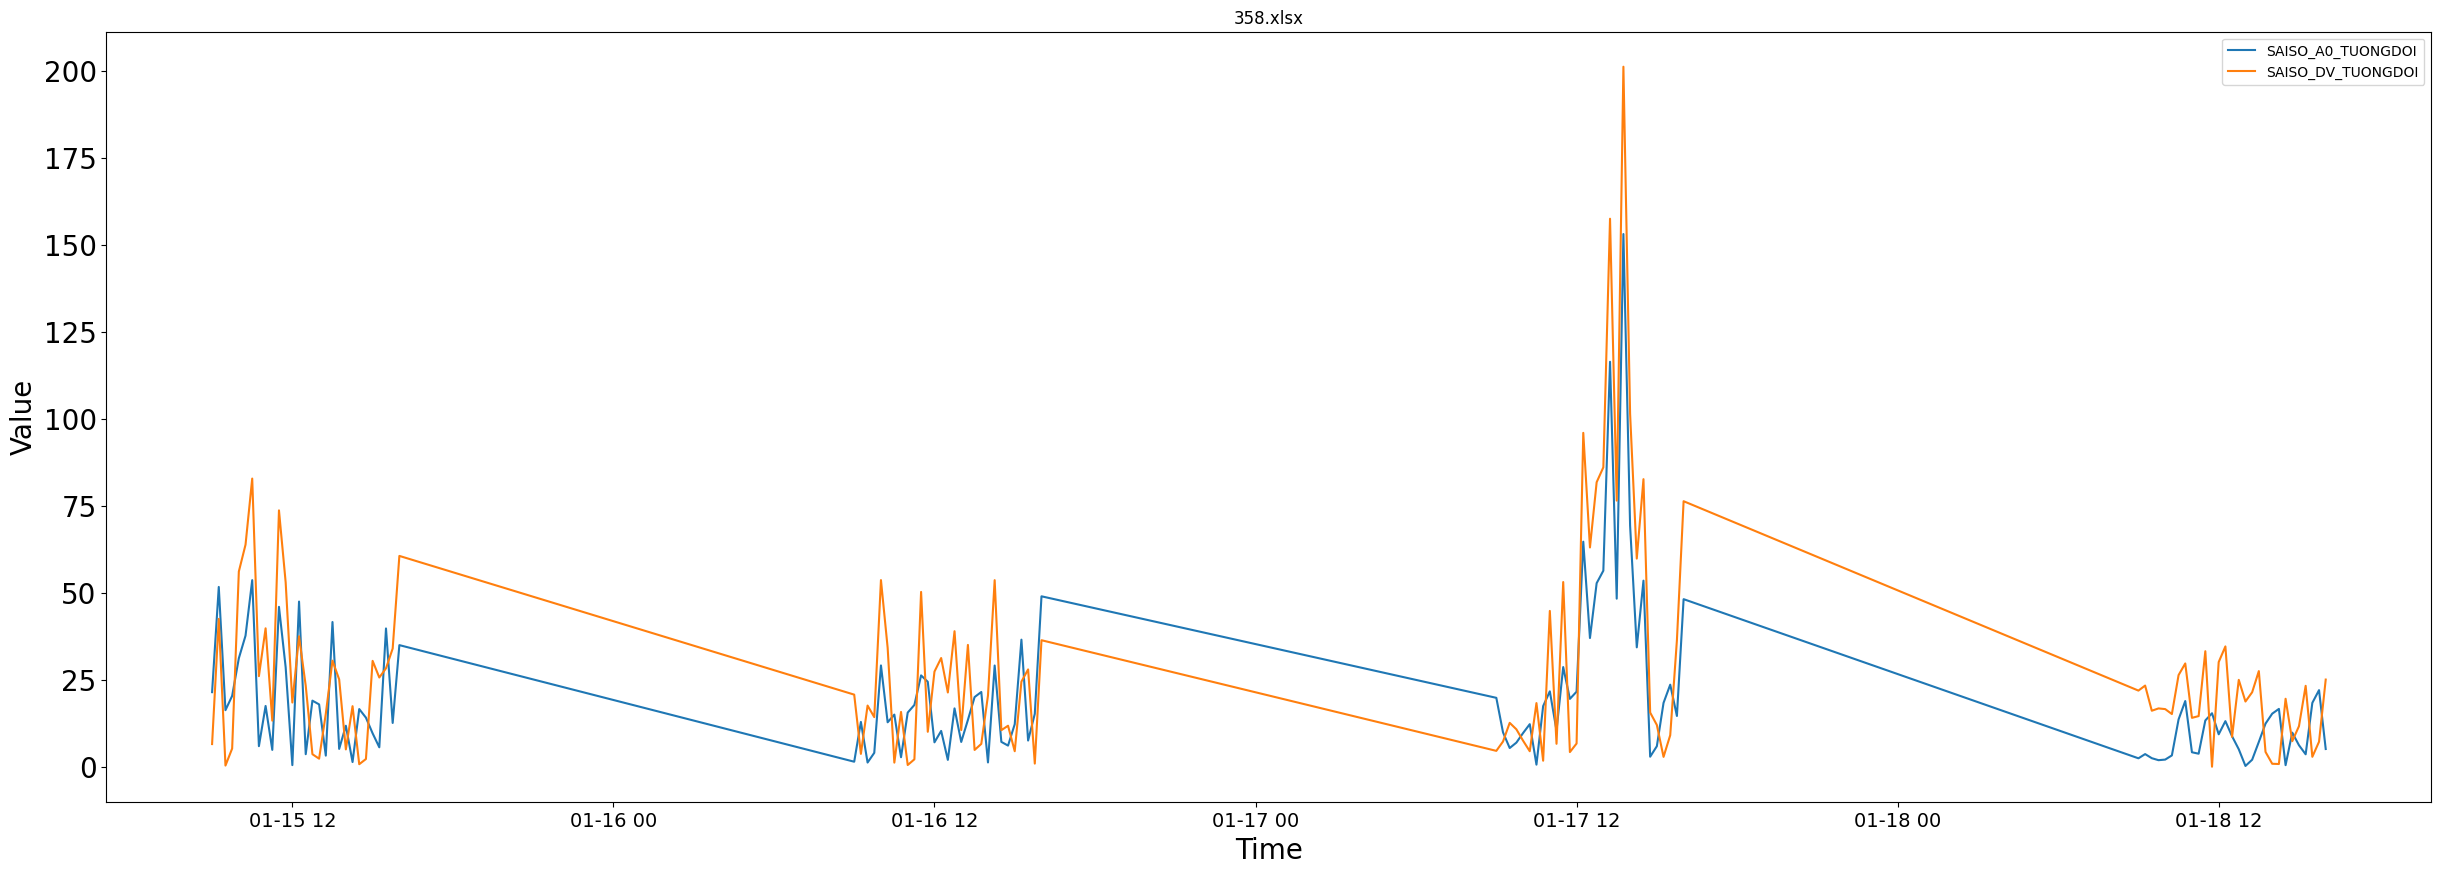

In [72]:
###SO SÁNH CS THỰC VỚI ƯỚC, DDDB, DVDB,DLC
def process_and_plot_P(file_path):
    file_name = os.path.basename(file_path)
    p=pd.read_excel(file_path)
    print(p)
    
    plt.figure(figsize=(30, 10))
    plt.plot(p['Time'], p['CS DVDB'], label='CS DVDB')
    plt.plot(p['Time'], p['CS ĐĐDB'], label='CS ĐĐDB')
    plt.plot(p['Time'], p['CSDBDLC'], label='CSDBDLC')
    plt.plot(p['Time'], p['P_uoc'], label='CS UOC')
    plt.plot(p['Time'], p['P_real'], label='CS THUC')
    plt.legend()
    plt.xlabel('Time', fontsize=20)  # Tăng cỡ chữ của chú thích trục x
    plt.ylabel('Value', fontsize=20)  # Tăng cỡ chữ của chú thích trục y
    plt.xticks(fontsize=14)  # Tăng cỡ chữ của giá trị trên trục x
    plt.yticks(fontsize=20)
    plt.title(file_name)
    plt.show()
    
    # Tính tổng sai số tuyệt đối
    p['SAISO_A0'] = abs(p['P_uoc'] - p['CS ĐĐDB'])
    p['SAISO_DV'] = abs(p['P_uoc'] - p['CS DVDB'])
    p['SAISO_DLC'] = abs(p['P_uoc'] - p['CSDBDLC'])
    
    # Tính tổng sai số tương đối
    # Chuyển đổi cột 'time' thành định dạng datetime
    p['Time'] = pd.to_datetime(p['Time'])

    # Lọc DataFrame để chỉ giữ lại các hàng có thời gian từ 9h-16h
    p_filtered = p.set_index('Time').between_time('9:00', '16:00').reset_index()

    # Tính sai số tương đối cho DataFrame mới
    p_filtered['SAISO_A0_TUONGDOI'] = abs(p_filtered['SAISO_A0'] / p_filtered['P_uoc'])*100
    p_filtered['SAISO_DV_TUONGDOI'] = abs(p_filtered['SAISO_DV'] / p_filtered['P_uoc'])*100
    p_filtered['SAISO_DLC_TUONGDOI'] = abs(p_filtered['SAISO_DLC'] / p_filtered['P_uoc'])*100
    p_filtered['SAISO_A0_TUONGDOI']=p_filtered['SAISO_A0_TUONGDOI'].round(2)
    p_filtered['SAISO_DV_TUONGDOI']=p_filtered['SAISO_DV_TUONGDOI'].round(2)
    p_filtered['SAISO_DLC_TUONGDOI']=p_filtered['SAISO_DLC_TUONGDOI'].round(2)

    #Vẽ biểu đồ sai số tuyệt đối
    plt.figure(figsize=(30, 10))
    plt.plot(p['Time'], p['SAISO_A0'], label='SAISO_A0')
    plt.plot(p['Time'], p['SAISO_DV'], label='SAISO_DV')
    plt.plot(p['Time'], p['SAISO_DLC'], label='SAISO_DLC')
    plt.legend()
    plt.xlabel('Time', fontsize=20)  # Tăng cỡ chữ của chú thích trục x
    plt.ylabel('Value', fontsize=20)  # Tăng cỡ chữ của chú thích trục y
    plt.xticks(fontsize=14)  # Tăng cỡ chữ của giá trị trên trục x
    plt.yticks(fontsize=20)
    plt.title(file_name)
    plt.show()
    
    #Vẽ biểu đồ sai số tương đối
    plt.figure(figsize=(30, 10))
    plt.plot(p_filtered['Time'], p_filtered['SAISO_A0_TUONGDOI'], label='SAISO_A0_TUONGDOI')
    plt.plot(p_filtered['Time'], p_filtered['SAISO_DV_TUONGDOI'], label='SAISO_DV_TUONGDOI')
    # plt.plot(p_filtered['Time'], p_filtered['SAISO_DLC_TUONGDOI'], label='SAISO_DLC_TUONGDOI')
    plt.legend()
    plt.xlabel('Time', fontsize=20)  # Tăng cỡ chữ của chú thích trục x
    plt.ylabel('Value', fontsize=20)  # Tăng cỡ chữ của chú thích trục y
    plt.xticks(fontsize=14)  # Tăng cỡ chữ của giá trị trên trục x
    plt.yticks(fontsize=20)
    plt.title(file_name)
    plt.show()  
    
process_and_plot_P('C:/Users/namnvn/Downloads/Dữ liệu CS ĐPG 15p/358.xlsx')

          time  ID_NM         Ten_NM   A_thuc       A_uoc
0   2024-01-01    458  MT Phước Ninh  160.720  217.819151
1   2024-01-02    458  MT Phước Ninh  182.020  214.297591
2   2024-01-03    458  MT Phước Ninh  177.290  210.332784
3   2024-01-04    458  MT Phước Ninh  187.690  227.643559
4   2024-01-05    458  MT Phước Ninh  196.990  224.592294
5   2024-01-06    458  MT Phước Ninh  144.880  168.820215
6   2024-01-07    458  MT Phước Ninh  188.780  223.894713
7   2024-01-08    458  MT Phước Ninh  150.780  168.229901
8   2024-01-09    458  MT Phước Ninh  190.960  210.074498
9   2024-01-10    458  MT Phước Ninh  179.480  221.465617
10  2024-01-11    458  MT Phước Ninh  176.050  229.291792
11  2024-01-12    458  MT Phước Ninh  175.920  212.561851
12  2024-01-13    458  MT Phước Ninh  157.750  194.291077
13  2024-01-14    458  MT Phước Ninh  165.930  193.262759
14  2024-01-15    458  MT Phước Ninh  147.580  167.240868
15  2024-01-16    458  MT Phước Ninh  161.927  202.481792
16  2024-01-17

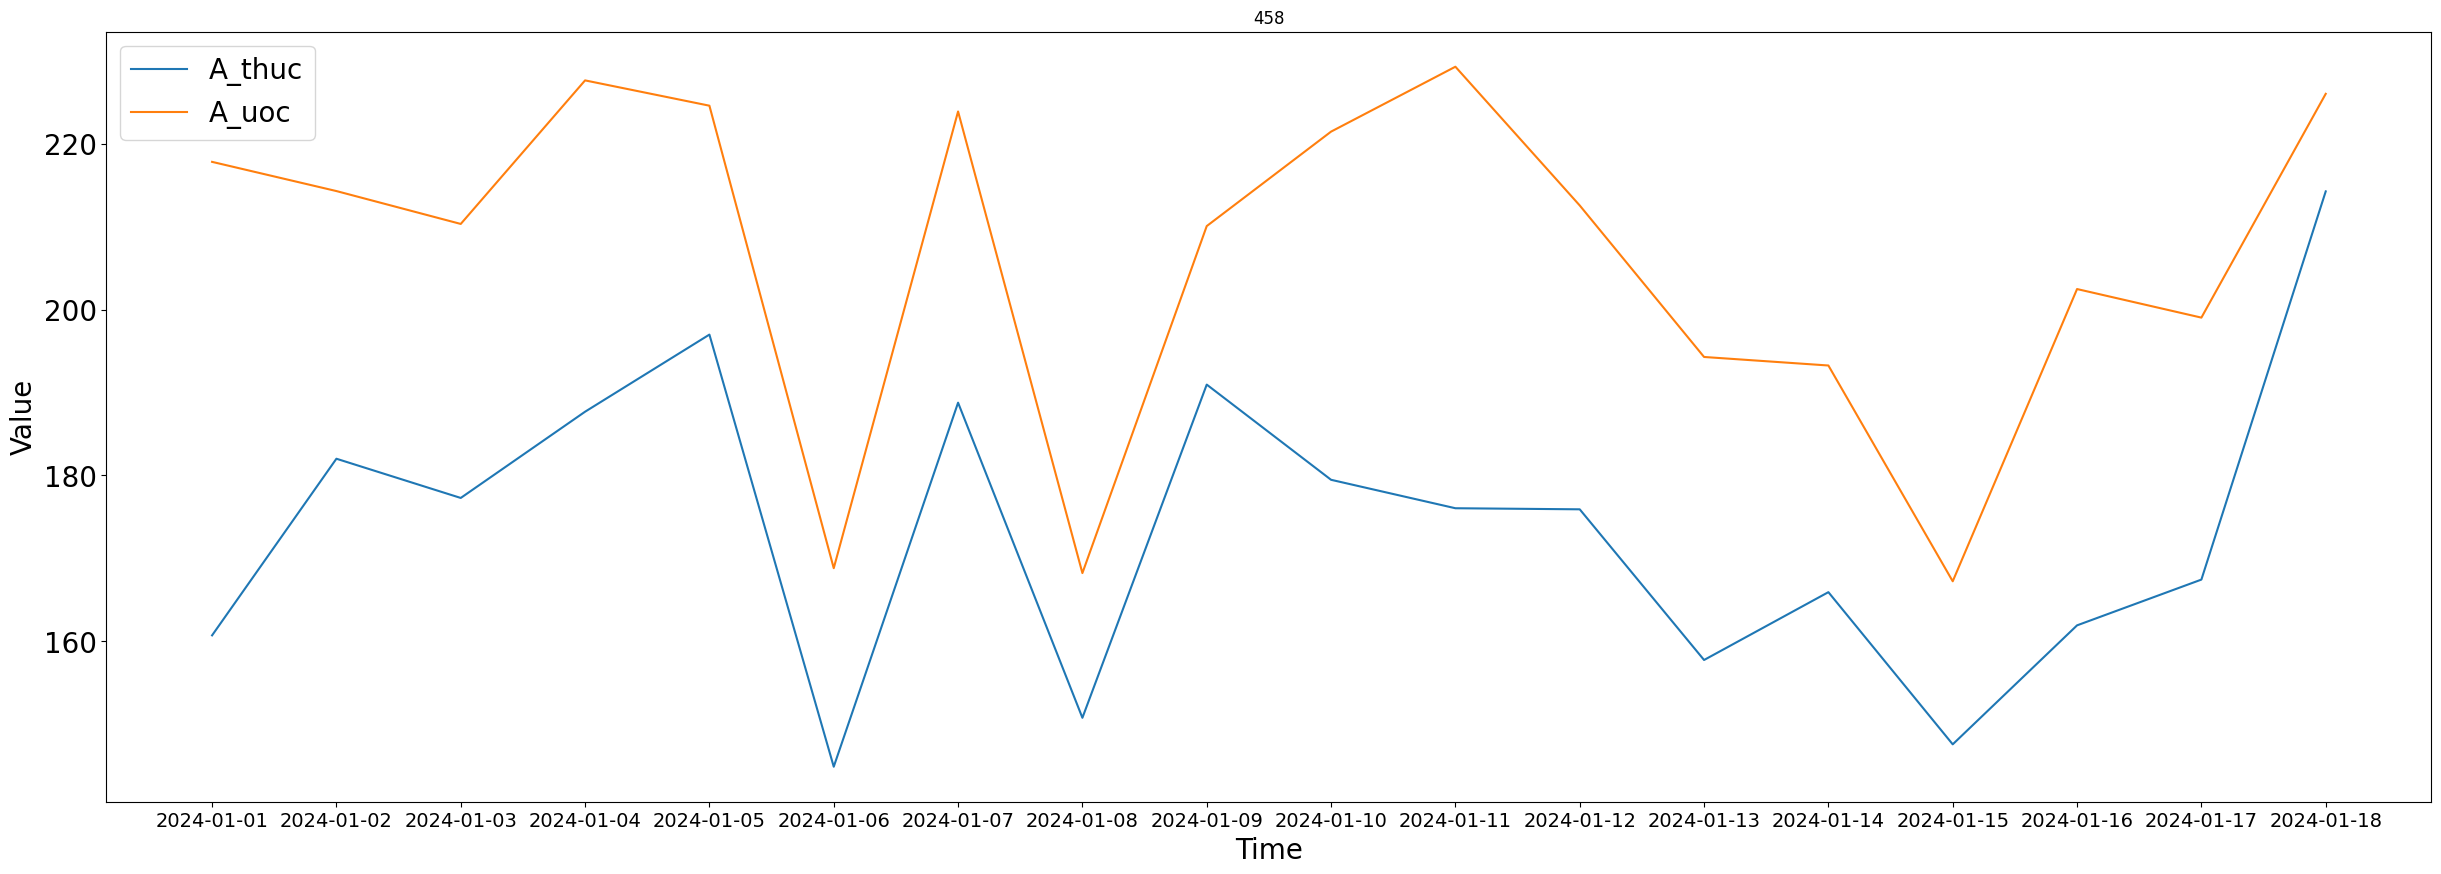

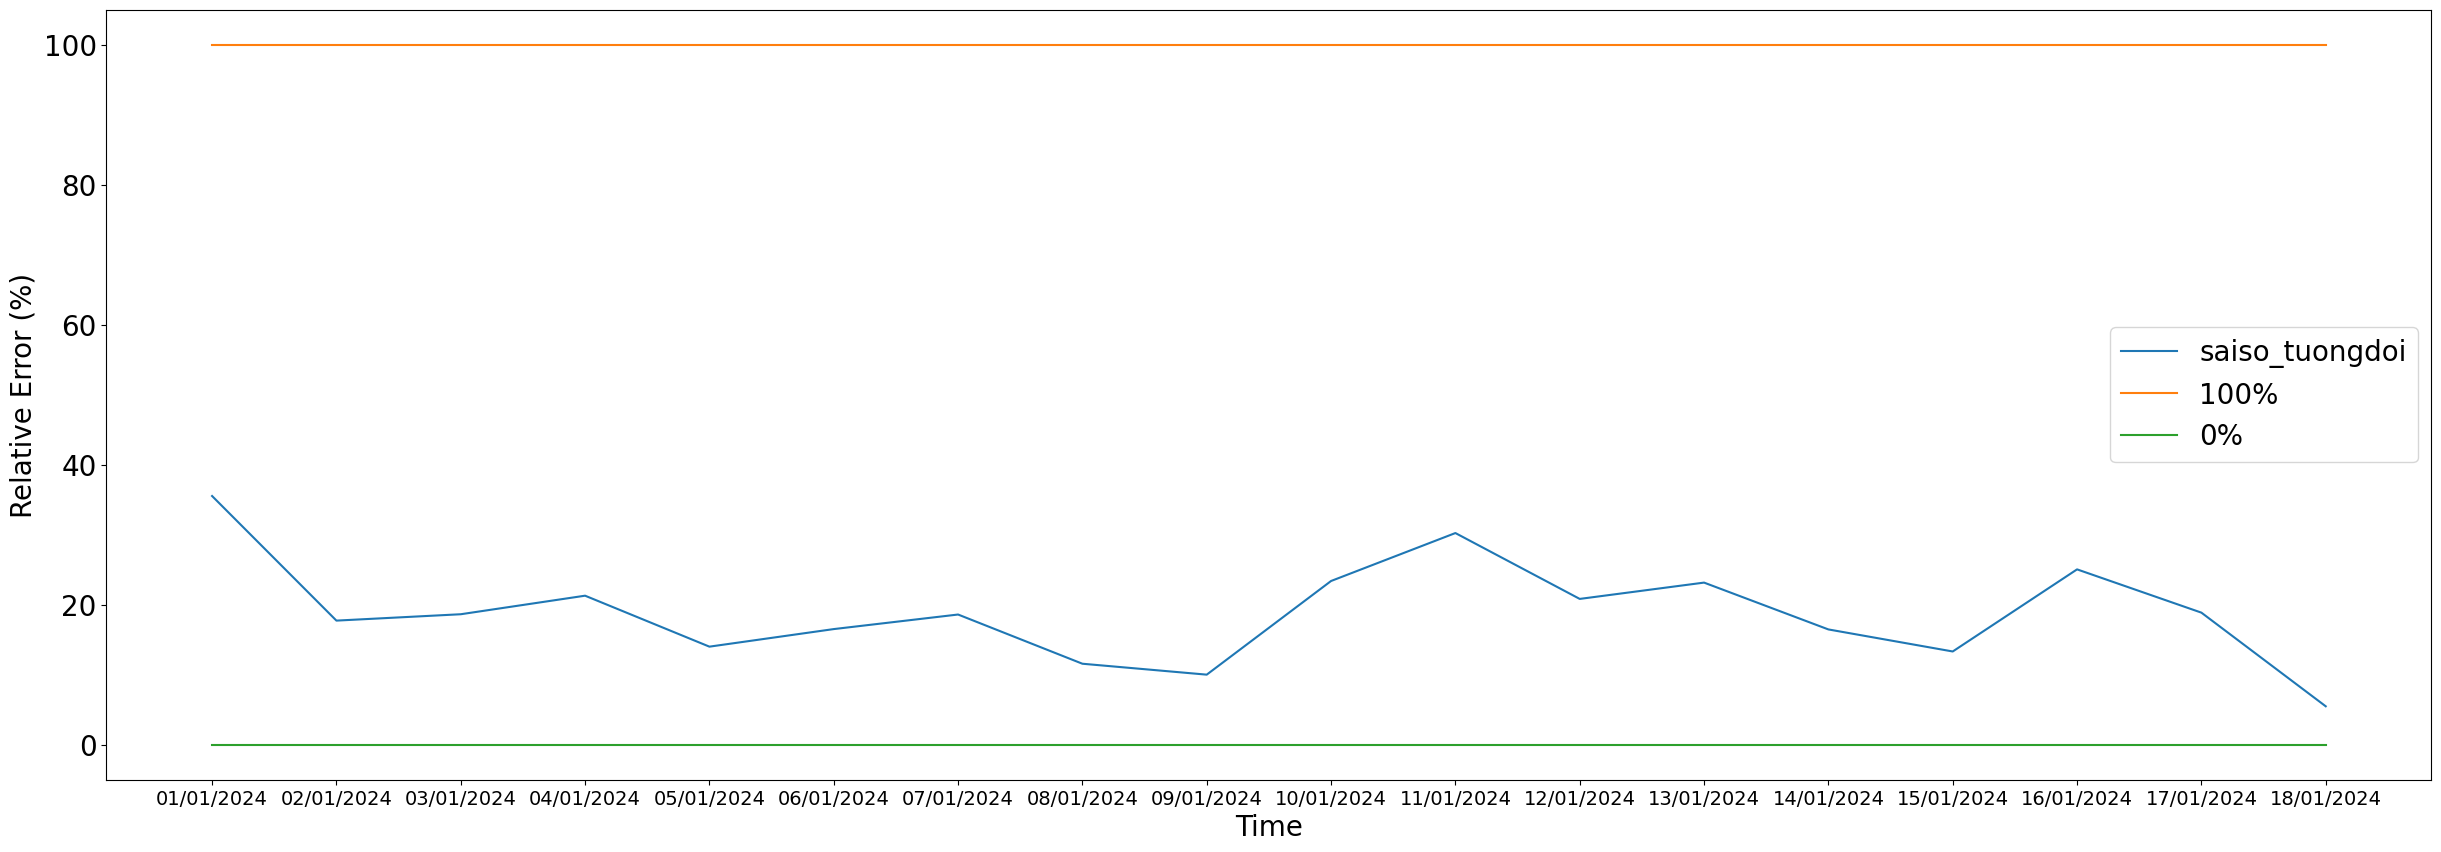

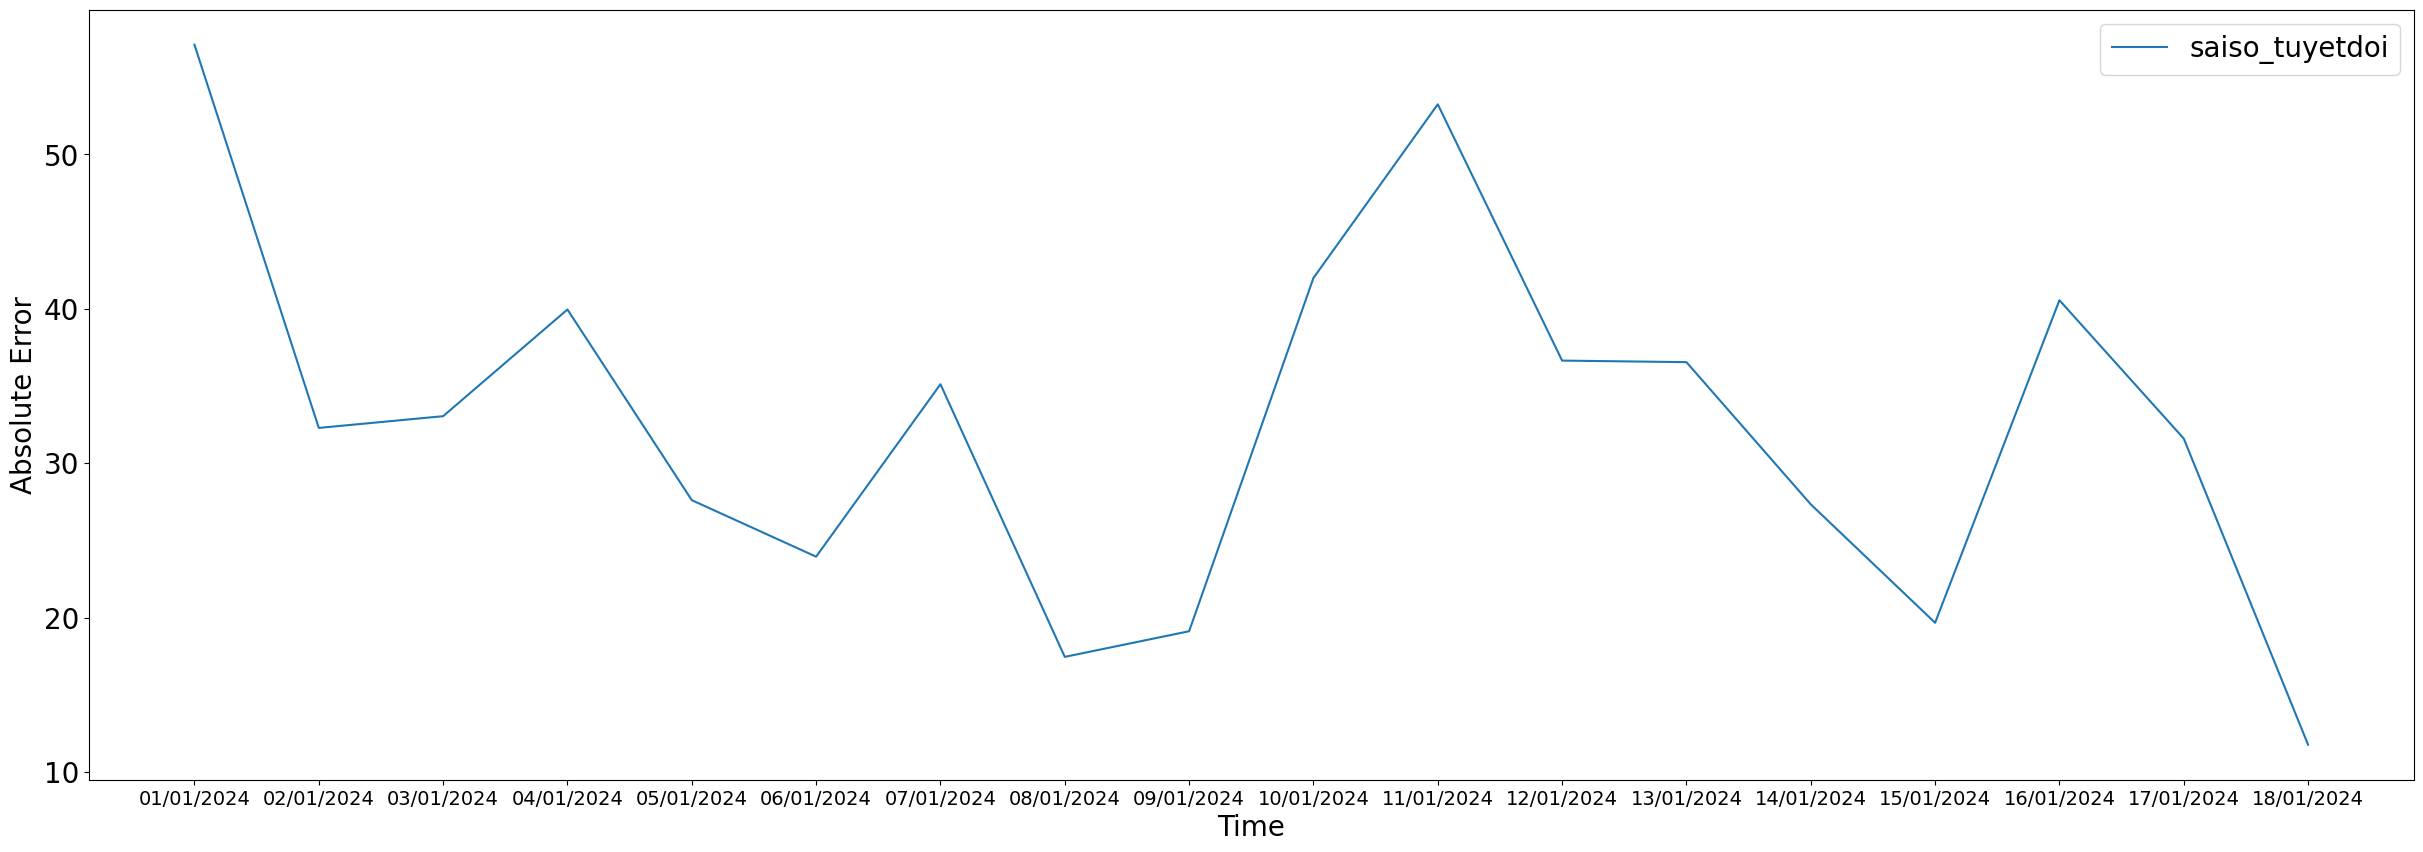

In [80]:
###SO SÁNH SẢN LƯỢNG THỰC VÀ ƯỚC
def process_and_plot_A(file_path):
    # Lấy tên file từ đường dẫn file
    file_name = os.path.basename(file_path).split('.')[0]
    
    sl = pd.read_excel(file_path)
    print(sl)
    plt.figure(figsize=(30,10))
    plt.plot(sl['time'], sl['A_thuc'], label='A_thuc')
    plt.plot(sl['time'], sl['A_uoc'], label='A_uoc')
    plt.legend(prop={'size': 20})  # Tăng cỡ chữ của nhãn
    plt.title(file_name)  # Thêm tên biểu đồ
    plt.xlabel('Time', fontsize=20)  # Tăng cỡ chữ của chú thích trục x
    plt.ylabel('Value', fontsize=20)  # Tăng cỡ chữ của chú thích trục y
    plt.xticks(fontsize=14)  # Tăng cỡ chữ của giá trị trên trục x
    plt.yticks(fontsize=20)
    plt.show()

    sl['A_thuc'] = sl['A_thuc'].astype(float)
    sl['A_uoc'] = sl['A_uoc'].astype(float)
    sl['saiso_tuyetdoi'] = abs(sl['A_thuc'] - sl['A_uoc'])
    sl['saiso_tuongdoi'] = sl['saiso_tuyetdoi'] / sl['A_thuc'] * 100
    sl['saiso_tuongdoi'] = sl['saiso_tuongdoi'].round(2)
    sl['saiso_tuyetdoi'] = sl['saiso_tuyetdoi'].round(2)
    sl['time'] = pd.to_datetime(sl['time'])
    sl['time'] = sl['time'].dt.strftime('%d/%m/%Y')

    sl = sl[['time', 'A_thuc', 'A_uoc', 'saiso_tuyetdoi', 'saiso_tuongdoi']]
    sl = sl.set_index('time')
    sl = sl.sort_values('time')
    sl = sl.reset_index()

    plt.figure(figsize=(30,10))
    plt.plot(sl['time'], sl['saiso_tuongdoi'], label='saiso_tuongdoi')
    plt.plot(sl['time'], [100]*len(sl['time']), label='100%')
    plt.plot(sl['time'], [0]*len(sl['time']), label='0%')
    plt.legend(prop={'size': 20})  # Tăng cỡ chữ của nhãn
    plt.xlabel('Time', fontsize=20)  # Tăng cỡ chữ của chú thích trục x
    plt.ylabel('Relative Error (%)', fontsize=20)  # Tăng cỡ chữ của chú thích trục y
    plt.xticks(fontsize=14)  # Tăng cỡ chữ của giá trị trên trục x
    plt.yticks(fontsize=20)  # Tăng cỡ chữ của giá trị trên trục y
    plt.show()

    plt.figure(figsize=(30,10))
    plt.plot(sl['time'], sl['saiso_tuyetdoi'], label='saiso_tuyetdoi')
    plt.legend(prop={'size': 20})  # Tăng cỡ chữ của nhãn
    plt.xlabel('Time', fontsize=20)  # Tăng cỡ chữ của chú thích trục x
    plt.ylabel('Absolute Error', fontsize=20)  # Tăng cỡ chữ của chú thích trục y
    plt.xticks(fontsize=14)  # Tăng cỡ chữ của giá trị trên trục x
    plt.yticks(fontsize=20)
    plt.show()

# Sử dụng hàm với đường dẫn file
process_and_plot_A('C:/Users/namnvn/Downloads/merged (2)/458.xlsx')

In [25]:
# Giả sử 'data' là DataFrame của bạn
data = data.sort_values(by='ID', key=lambda x: x.map({362:0, 381:1, 382:2, 374:3, 149:4, 526:5, 527:6, 545:7, 536:8, 539:9,
                                                       533:10, 478:11, 571:12, 553:13, 556:14, 391:15, 2023:16, 519:17,
                                                       555:18, 521:19, 562:20, 755:21, 758:22, 784:23, 791:24, 794:25,
                                                       846:26, 1141:27, 870:28, 905:29, 1279:30, 917:31, 764:32, 808:33,
                                                       818:34, 830:35, 757:36, 789:37, 831:38, 1142:39, 1285:40, 903:41,
                                                       914:42, 753:43, 796:44, 819:45, 1132:46, 824:47, 829:48, 837:49,
                                                       849:50, 869:51, 876:52, 896:53, 1146:54, 1475:55, 872:56, 918:57,
                                                       761:58, 785:59, 801:60, 1229:61, 859:62, 1273:63, 1144:64, 915:65,
                                                       3782:66, 3783:67, 1251:68, 800:69, 855:70, 1564:71, 878:72, 901:73,
                                                       913:74, 919:75, 779:76, 788:77, 832:78, 833:79, 843:80, 866:81,
                                                       907:82, 1143:83, 909:84, 1145:85, 2698:86, 558:87, 275:88, 2011:89}))

# Đường dẫn để lưu tệp CSV
# output_path = r'P:\7. User\NAMNVN\data_sorted.csv'

# # Xuất DataFrame thành tệp CSV
# data.to_csv(output_path, index=False)

# print(f'Dữ liệu đã được xuất thành công vào: {output_path}')

Dữ liệu đã được xuất thành công vào: P:\7. User\NAMNVN\data_sorted.csv


In [12]:
HL1_THUCPHAT = data[data['ID'] == 231][['Time', 'VAL', 'ID_TH', 'ID']]
HL2_THUCPHAT = data[data['ID'] == 220][['Time', 'VAL', 'ID_TH', 'ID']]
HL3_THUCPHAT = data[data['ID'] == 569][['Time', 'VAL', 'ID_TH', 'ID']]

HL1_TP = HL1_THUCPHAT[HL1_THUCPHAT['ID_TH'] == 1][['Time', 'VAL']]
HL1_NLSCTP = HL1_THUCPHAT[HL1_THUCPHAT['ID_TH'] == 7][['Time', 'VAL']]

HL2_TP = HL2_THUCPHAT[HL2_THUCPHAT['ID_TH'] == 1][['Time', 'VAL']]
HL2_NLSCTP = HL2_THUCPHAT[HL2_THUCPHAT['ID_TH'] == 7][['Time', 'VAL']]

HL3_TP = HL3_THUCPHAT[HL3_THUCPHAT['ID_TH'] == 1][['Time', 'VAL']]
HL3_NLSCTP = HL3_THUCPHAT[HL3_THUCPHAT['ID_TH'] == 7][['Time', 'VAL']]
print(HL1_TP['VAL'].shape,HL2_TP['VAL'].shape,HL3_TP['VAL'].shape)

(6629,) (6629,) (6629,)


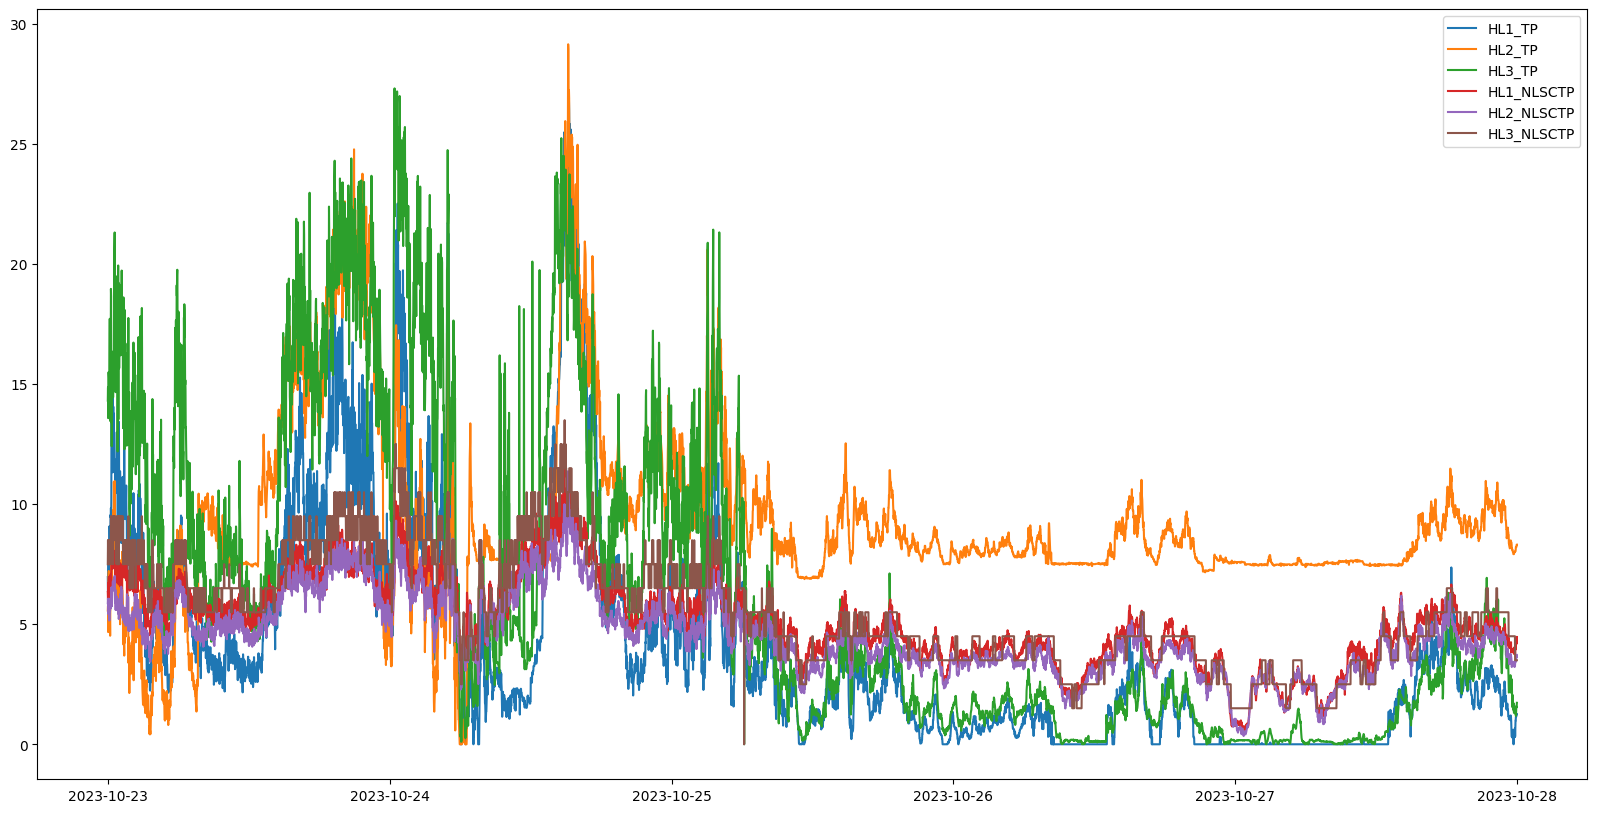

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(HL1_TP['Time'], HL1_TP['VAL'], label='HL1_TP')
plt.plot(HL2_TP['Time'], HL2_TP['VAL'], label='HL2_TP')
plt.plot(HL3_TP['Time'], HL3_TP['VAL'], label='HL3_TP')
plt.plot(HL1_NLSCTP['Time'], HL1_NLSCTP['VAL'], label='HL1_NLSCTP')
plt.plot(HL2_NLSCTP['Time'], HL2_NLSCTP['VAL'], label='HL2_NLSCTP')
plt.plot(HL3_NLSCTP['Time'], HL3_NLSCTP['VAL'], label='HL3_NLSCTP')
plt.legend()
plt.show()

# plt.figure(figsize=(20, 10))
# plt.plot(HL1_TP['Time'], HL1_TP['VAL'], label='HL1_TP')
# plt.plot(HL2_TP['Time'], HL2_TP['VAL'], label='HL2_TP')
# plt.plot(HL3_TP['Time'], HL3_TP['VAL'], label='HL3_TP')
# plt.legend()
# plt.show()

# plt.figure(figsize=(20, 10))
# plt.plot(HL1_NLSCTP['Time'], HL1_NLSCTP['VAL'], label='HL1_NLSCTP')
# plt.plot(HL2_NLSCTP['Time'], HL2_NLSCTP['VAL'], label='HL2_NLSCTP')
# plt.plot(HL3_NLSCTP['Time'], HL3_NLSCTP['VAL'], label='HL3_NLSCTP')
# plt.legend()
# plt.show()

In [2]:
db = DB_PNLTT()
sDate = datetime(2024,1,1,0,0,0)
eDate = datetime(2025,1,11,0,0,0)
listID = [377, 376, 2258, 2011]
data1 = pd.DataFrame(db.query(f"""SELECT e.ID_NM, e.ID_LOAIHINH, A.CONGSUAT_DONVI_DUBAO,A.CONGSUAT_DIEUDO_DUBAO ,C.NGAY + (A.CHUKY-1)*15/24/60 AS THOIDIEM_THUTHAP ,
A.CONGSUAT_DONVI_DUBAO*A.CHONNGUON_DONVI + A.CONGSUAT_DIEUDO_DUBAO*(1- A.CHONNGUON_DONVI) AS CS_CHON
FROM  PDB_ADM.SMOV_RTP_DD_CONGBO_DB_NLTT_IAH A   
INNER JOIN PDB_ADM.SMOV_RIS_DD_CONGBO_DB_NLTT_IAH B ON A.ID_RIS = B.ID_RIS   
INNER JOIN PDB_ADM.SMOV_DONVI_NGAY C ON b.ID_DONVI_NGAY = c.ID_DONVI_NGAY   
INNER JOIN  PDB_ADM.HT_DONVI d on C.UNITID = d.UNITID   
INNER JOIN PDB_ADM.HT_NHAMAY e on d.ID_DV = e.ID_NM   
WHERE B.TIMESTEP = 15 AND C.NGAY >= TO_DATE('{sDate.strftime('%m/%d/%Y')}','MM/DD/YYYY') AND 
C.NGAY <= TO_DATE('{eDate.strftime('%m/%d/%Y')}','MM/DD/YYYY') AND d.ID_LOAIDV = 4  
AND e.ID_NM in {tuple(listID)}
ORDER BY THOIDIEM_THUTHAP"""), columns=['ID','Loại hình','CS DVDB','CS ĐĐDB','Time','CSDBDLC'])
data1

ID  Loại hình  CS DVDB  CS ĐĐDB                Time  CSDBDLC
0       2258          8   28.124   27.951 2024-01-01 00:00:00   28.124
1        376          9    0.000    0.000 2024-01-01 00:00:00    0.000
2        377          9    0.000    0.000 2024-01-01 00:00:00    0.000
3       2011          8   72.750   37.616 2024-01-01 00:00:00   37.616
4       2258          8   27.845   27.857 2024-01-01 00:15:00   27.845
...      ...        ...      ...      ...                 ...      ...
144739  2011          8   49.990   49.069 2025-01-11 23:30:00   49.069
144740  2011          8   44.710   45.178 2025-01-11 23:45:00   45.178
144741   376          9    0.000    0.000 2025-01-11 23:45:00    0.000
144742   377          9    0.000    0.000 2025-01-11 23:45:00    0.000
144743  2258          8   18.200   17.868 2025-01-11 23:45:00   17.868

[144744 rows x 6 columns]

LAY SO A0 DB, DVDB

In [2]:
db = DB_PNLTT()
sDate = datetime(2024,1,1,0,0,0)
eDate = datetime(2025,1,11,0,0,0)
listID = [377, 376, 2258, 2011]
data1 = pd.DataFrame(db.query(f"""SELECT e.ID_NM, A.CONGSUAT_DONVI_DUBAO,A.CONGSUAT_DIEUDO_DUBAO ,C.NGAY + (A.CHUKY-1)*15/24/60 AS THOIDIEM_THUTHAP
FROM  PDB_ADM.SMOV_RTP_DD_CONGBO_DB_NLTT_IAH A   
INNER JOIN PDB_ADM.SMOV_RIS_DD_CONGBO_DB_NLTT_IAH B ON A.ID_RIS = B.ID_RIS   
INNER JOIN PDB_ADM.SMOV_DONVI_NGAY C ON b.ID_DONVI_NGAY = c.ID_DONVI_NGAY   
INNER JOIN  PDB_ADM.HT_DONVI d on C.UNITID = d.UNITID   
INNER JOIN PDB_ADM.HT_NHAMAY e on d.ID_DV = e.ID_NM   
WHERE B.TIMESTEP = 15 AND C.NGAY >= TO_DATE('{sDate.strftime('%m/%d/%Y')}','MM/DD/YYYY') AND 
C.NGAY <= TO_DATE('{eDate.strftime('%m/%d/%Y')}','MM/DD/YYYY') AND d.ID_LOAIDV = 4  
AND e.ID_NM in {tuple(listID)}
ORDER BY THOIDIEM_THUTHAP"""), columns=['ID','CS DVDB','CS ĐĐDB','Time'])
data1

ID  CS DVDB  CS ĐĐDB                Time
0       2258   28.124   27.951 2024-01-01 00:00:00
1        376    0.000    0.000 2024-01-01 00:00:00
2        377    0.000    0.000 2024-01-01 00:00:00
3       2011   72.750   37.616 2024-01-01 00:00:00
4       2258   27.845   27.857 2024-01-01 00:15:00
...      ...      ...      ...                 ...
144739  2011   49.990   49.069 2025-01-11 23:30:00
144740  2011   44.710   45.178 2025-01-11 23:45:00
144741   376    0.000    0.000 2025-01-11 23:45:00
144742   377    0.000    0.000 2025-01-11 23:45:00
144743  2258   18.200   17.868 2025-01-11 23:45:00

[144744 rows x 4 columns]

In [8]:
db = SQL_NLTT_NOIBO()
listID = [377, 376, 2258, 2011]
sDate = datetime(2024,1,1)
eDate = datetime(2025,1,1)
# Convert list of IDs to string format
id_str = ', '.join(map(str, listID))

data2 = pd.DataFrame.from_records(db.query(f"""
SELECT ID_NM, THOIDIEM_THUTHAP, CONGSUAT_THUCPHAT, CONGSUAT_KHOIPHUC
FROM NLTT_UOCTINH_CONGSUAT
WHERE THOIDIEM_THUTHAP between '{sDate.strftime('%Y-%m-%d')}' and '{eDate.strftime('%Y-%m-%d')}'
AND ID_NM in {tuple(listID)}
ORDER BY THOIDIEM_THUTHAP 
"""), columns=['ID','Time','P_real','P_uoc'])
# Chỉ lấy các giá trị tại thời điểm 0, 15, 30,45 phút
data2 = data2[data2['Time'].dt.minute.isin([0, 15, 30, 45])]

In [13]:
df_P = data2
df_db = data1

# Merge 2 data dựa trên cột Time và ID
df = pd.merge(df_P, df_db, on=['Time', 'ID'], how='inner')

for id in listID:
    globals()[f'df_{id}'] = df[df['ID'] == id]

In [ ]:
df_377.to_csv('C:/Users/namnvn/Downloads/merged (2)/377.csv', index=False)

ID                Time     P_real      P_uoc  CS DVDB  CS ĐĐDB
1      377 2024-01-01 00:00:00   0.000000   0.000000     0.00    0.000
4      377 2024-01-01 00:15:00   0.000000   0.000000     0.00    0.000
8      377 2024-01-01 00:30:00   0.000000   0.000000     0.00    0.000
12     377 2024-01-01 00:45:00   0.000000   0.000000     0.00    0.000
16     377 2024-01-01 01:00:00   0.000000   0.000000     0.00    0.000
...    ...                 ...        ...        ...      ...      ...
42637  377 2024-04-21 11:15:00  36.598999  40.038223    44.88   39.782
42641  377 2024-04-21 11:30:00  34.444298  37.678385    45.04   37.936
42645  377 2024-04-21 11:45:00  33.994900  41.218142    44.94   38.766
42649  377 2024-04-21 12:00:00  34.535500  39.590668    44.68   38.427
42653  377 2024-04-21 12:15:00  35.147697  40.526465    44.28   38.424

[10664 rows x 6 columns]

In [15]:
HL1_DB = data1[data1['ID'] == 231][['Time', 'CS DVDB', 'CS ĐĐDB', 'CSDBDLC']]
HL2_DB = data1[data1['ID'] == 220][['Time', 'CS DVDB', 'CS ĐĐDB', 'CSDBDLC']]
HL3_DB = data1[data1['ID'] == 569][['Time', 'CS DVDB', 'CS ĐĐDB', 'CSDBDLC']]

HL1_DVDB = HL1_DB[['Time', 'CS DVDB']]
HL1_DDDB = HL1_DB[['Time', 'CS ĐĐDB']]
HL1_DBDLC= HL1_DB[['Time','CSDBDLC']]

HL2_DVDB = HL2_DB[['Time', 'CS DVDB']]
HL2_DDDB = HL2_DB[['Time', 'CS ĐĐDB']]
HL2_DBDLC= HL2_DB[['Time','CSDBDLC']]

HL3_DVDB = HL3_DB[['Time', 'CS DVDB']]
HL3_DDDB = HL3_DB[['Time', 'CS ĐĐDB']]
HL3_DBDLC= HL3_DB[['Time','CSDBDLC']]

HL1_DDDB.set_index('Time', inplace = True)
HL2_DDDB.set_index('Time', inplace = True)
HL3_DDDB.set_index('Time', inplace = True)
print(HL1_DVDB['CS DVDB'].shape,HL1_DDDB['CS ĐĐDB'].shape,HL1_DBDLC['CSDBDLC'].shape)

(672,) (672,) (672,)


KeyError: 'Time'

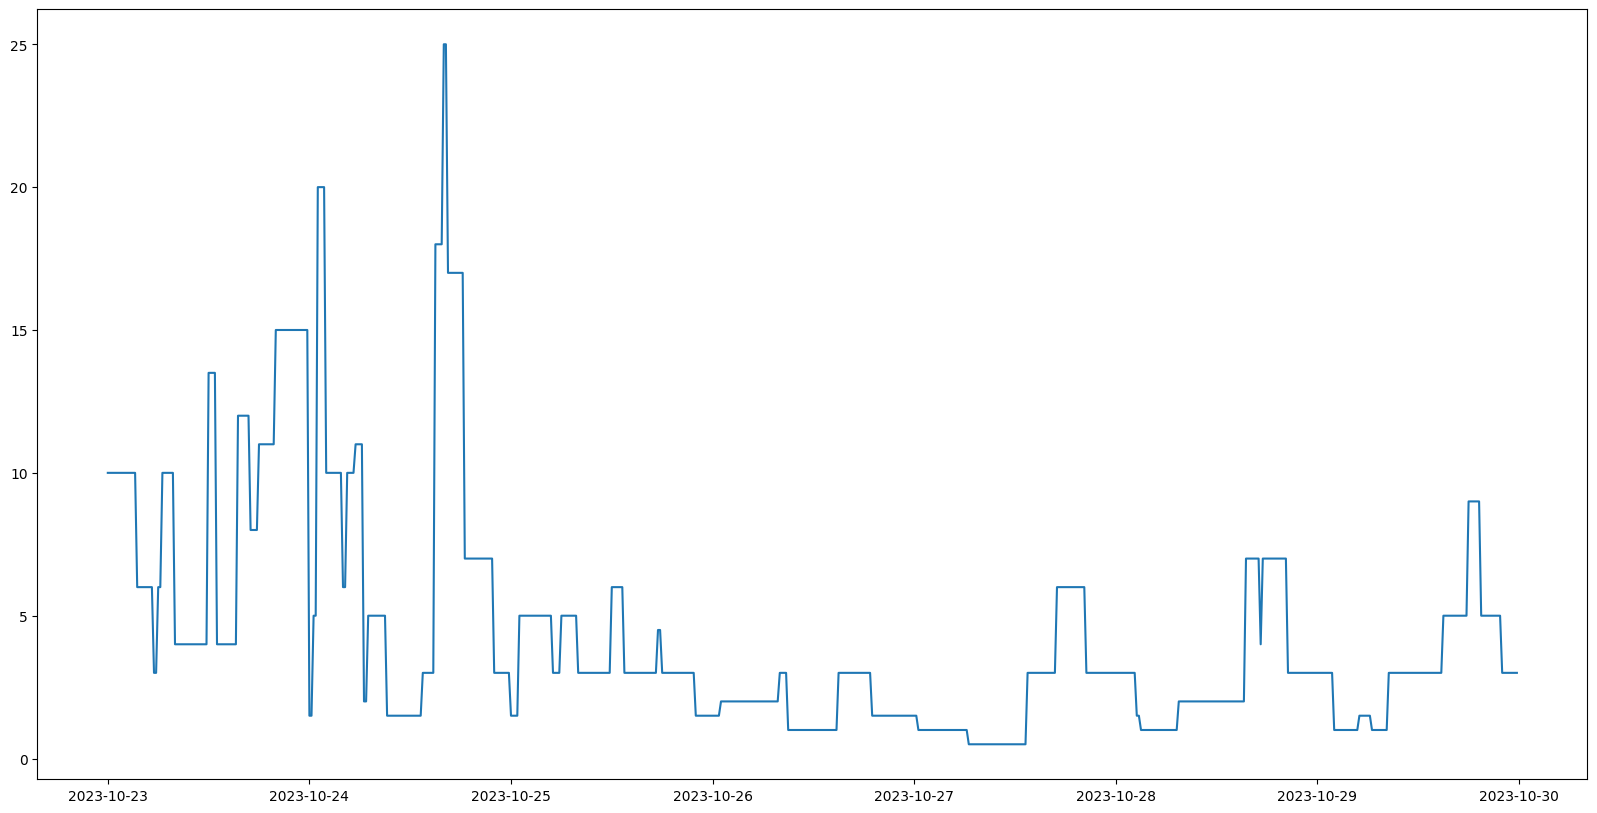

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(HL1_DVDB['Time'], HL1_DVDB['CS DVDB'], label='HL1_DVDB')
plt.plot(HL1_DDDB['Time'], HL1_DDDB['CS ĐĐDB'], label='HL1_DDDB')
plt.plot(HL1_DBDLC['Time'], HL1_DBDLC['CSDBDLC'], label='HL1_DBDLC')
plt.legend()
plt.show()
plt.figure(figsize=(20, 10))
plt.plot(HL2_DVDB['Time'], HL2_DVDB['CS DVDB'], label='HL2_DVDB')
plt.plot(HL2_DDDB['Time'], HL2_DDDB['CS ĐĐDB'], label='HL2_DDDB')
plt.plot(HL2_DBDLC['Time'], HL2_DBDLC['CSDBDLC'], label='HL2_DBDLC')
plt.legend()
plt.show()
plt.figure(figsize=(20, 10))
plt.plot(HL3_DVDB['Time'], HL3_DVDB['CS DVDB'], label='HL3_DVDB')
plt.plot(HL3_DDDB['Time'], HL3_DDDB['CS ĐĐDB'], label='HL3_DDDB')
plt.plot(HL3_DBDLC['Time'], HL3_DBDLC['CSDBDLC'], label='HL3_DBDLC')
plt.legend()
plt.show()

In [ ]:
print(HL1_DDDB)

                     CS ĐĐDB
Time                        
2023-10-23 00:00:00    6.907
2023-10-23 00:15:00    6.679
2023-10-23 00:30:00    7.913
2023-10-23 00:45:00    7.759
2023-10-23 01:00:00    9.342
...                      ...
2023-10-29 22:45:00    3.935
2023-10-29 23:00:00    3.477
2023-10-29 23:15:00    3.511
2023-10-29 23:30:00    2.858
2023-10-29 23:45:00    2.912

[672 rows x 1 columns]


In [17]:
db = SQL_NLTT_NOIBO()
sDate = datetime(2023,10,23,0,0,0)
eDate = datetime(2023,10,30,0,0,0)
data2 = pd.DataFrame.from_records(db.query(f"""
select ID_NM, THOIDIEM_THUTHAP, NANGLUONG_SOCAP, CONGSUAT_THUCPHAT, CONGSUAT_KHOIPHUC from DB_NOIBO.dbo.NLTT_UOCTINH_CONGSUAT 
where THOIDIEM_THUTHAP between '{sDate.strftime('%Y-%m-%d')}' and '{eDate.strftime('%Y-%m-%d')}'
and ID_NM in {tuple(listID)} order by THOIDIEM_THUTHAP 
"""), columns=['ID','Time','NLSC','P_real','P_uoc'])
data2

ID                Time     NLSC    P_real     P_uoc
0      220 2023-10-23 00:00:00  5.87500   5.57036   5.57036
1      231 2023-10-23 00:00:00  6.34375   6.96514   6.96514
2      569 2023-10-23 00:00:00  7.50000  14.31500  14.31500
3      569 2023-10-23 00:01:00  8.50000  14.85900  14.85900
4      231 2023-10-23 00:01:00  6.03125   6.33854   6.33854
...    ...                 ...      ...       ...       ...
29593  569 2023-10-29 23:59:00  3.50000   1.68800   1.68800
29594  220 2023-10-29 23:59:00  3.37500   7.92484   7.92484
29595  220 2023-10-30 00:00:00  3.39063   8.15429   8.15429
29596  231 2023-10-30 00:00:00  4.62500   2.39993   3.15750
29597  569 2023-10-30 00:00:00  3.50000   1.61900   1.61900

[29598 rows x 5 columns]

C:\Users\namnvn\AppData\Local\Temp\ipykernel_19504\1645188267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HL1_NLSC['Time']=pd.to_datetime(HL1_NLSC['Time'])


(673, 1) (673, 1)
                         NLSC      P_uoc  CS ĐĐDB     P_real
Time                                                        
2023-10-23 00:00:00  6.643750   8.160650    6.907   8.160650
2023-10-23 00:15:00  7.581250  12.291549    6.679  12.291549
2023-10-23 00:30:00  7.503125  11.552520    7.913  11.552520
2023-10-23 00:45:00  7.311458  11.276071    7.759  11.276071
2023-10-23 01:00:00  7.046875  10.016833    9.342  10.016833
...                       ...        ...      ...        ...
2023-10-29 22:45:00  3.969791   1.786183    3.935   1.295906
2023-10-29 23:00:00  4.040624   1.900779    3.477   1.116757
2023-10-29 23:15:00  4.465625   2.806687    3.511   1.682834
2023-10-29 23:30:00  4.462500   2.788500    2.858   1.757855
2023-10-29 23:45:00  4.660417   3.251375    2.912   2.297337

[672 rows x 4 columns]


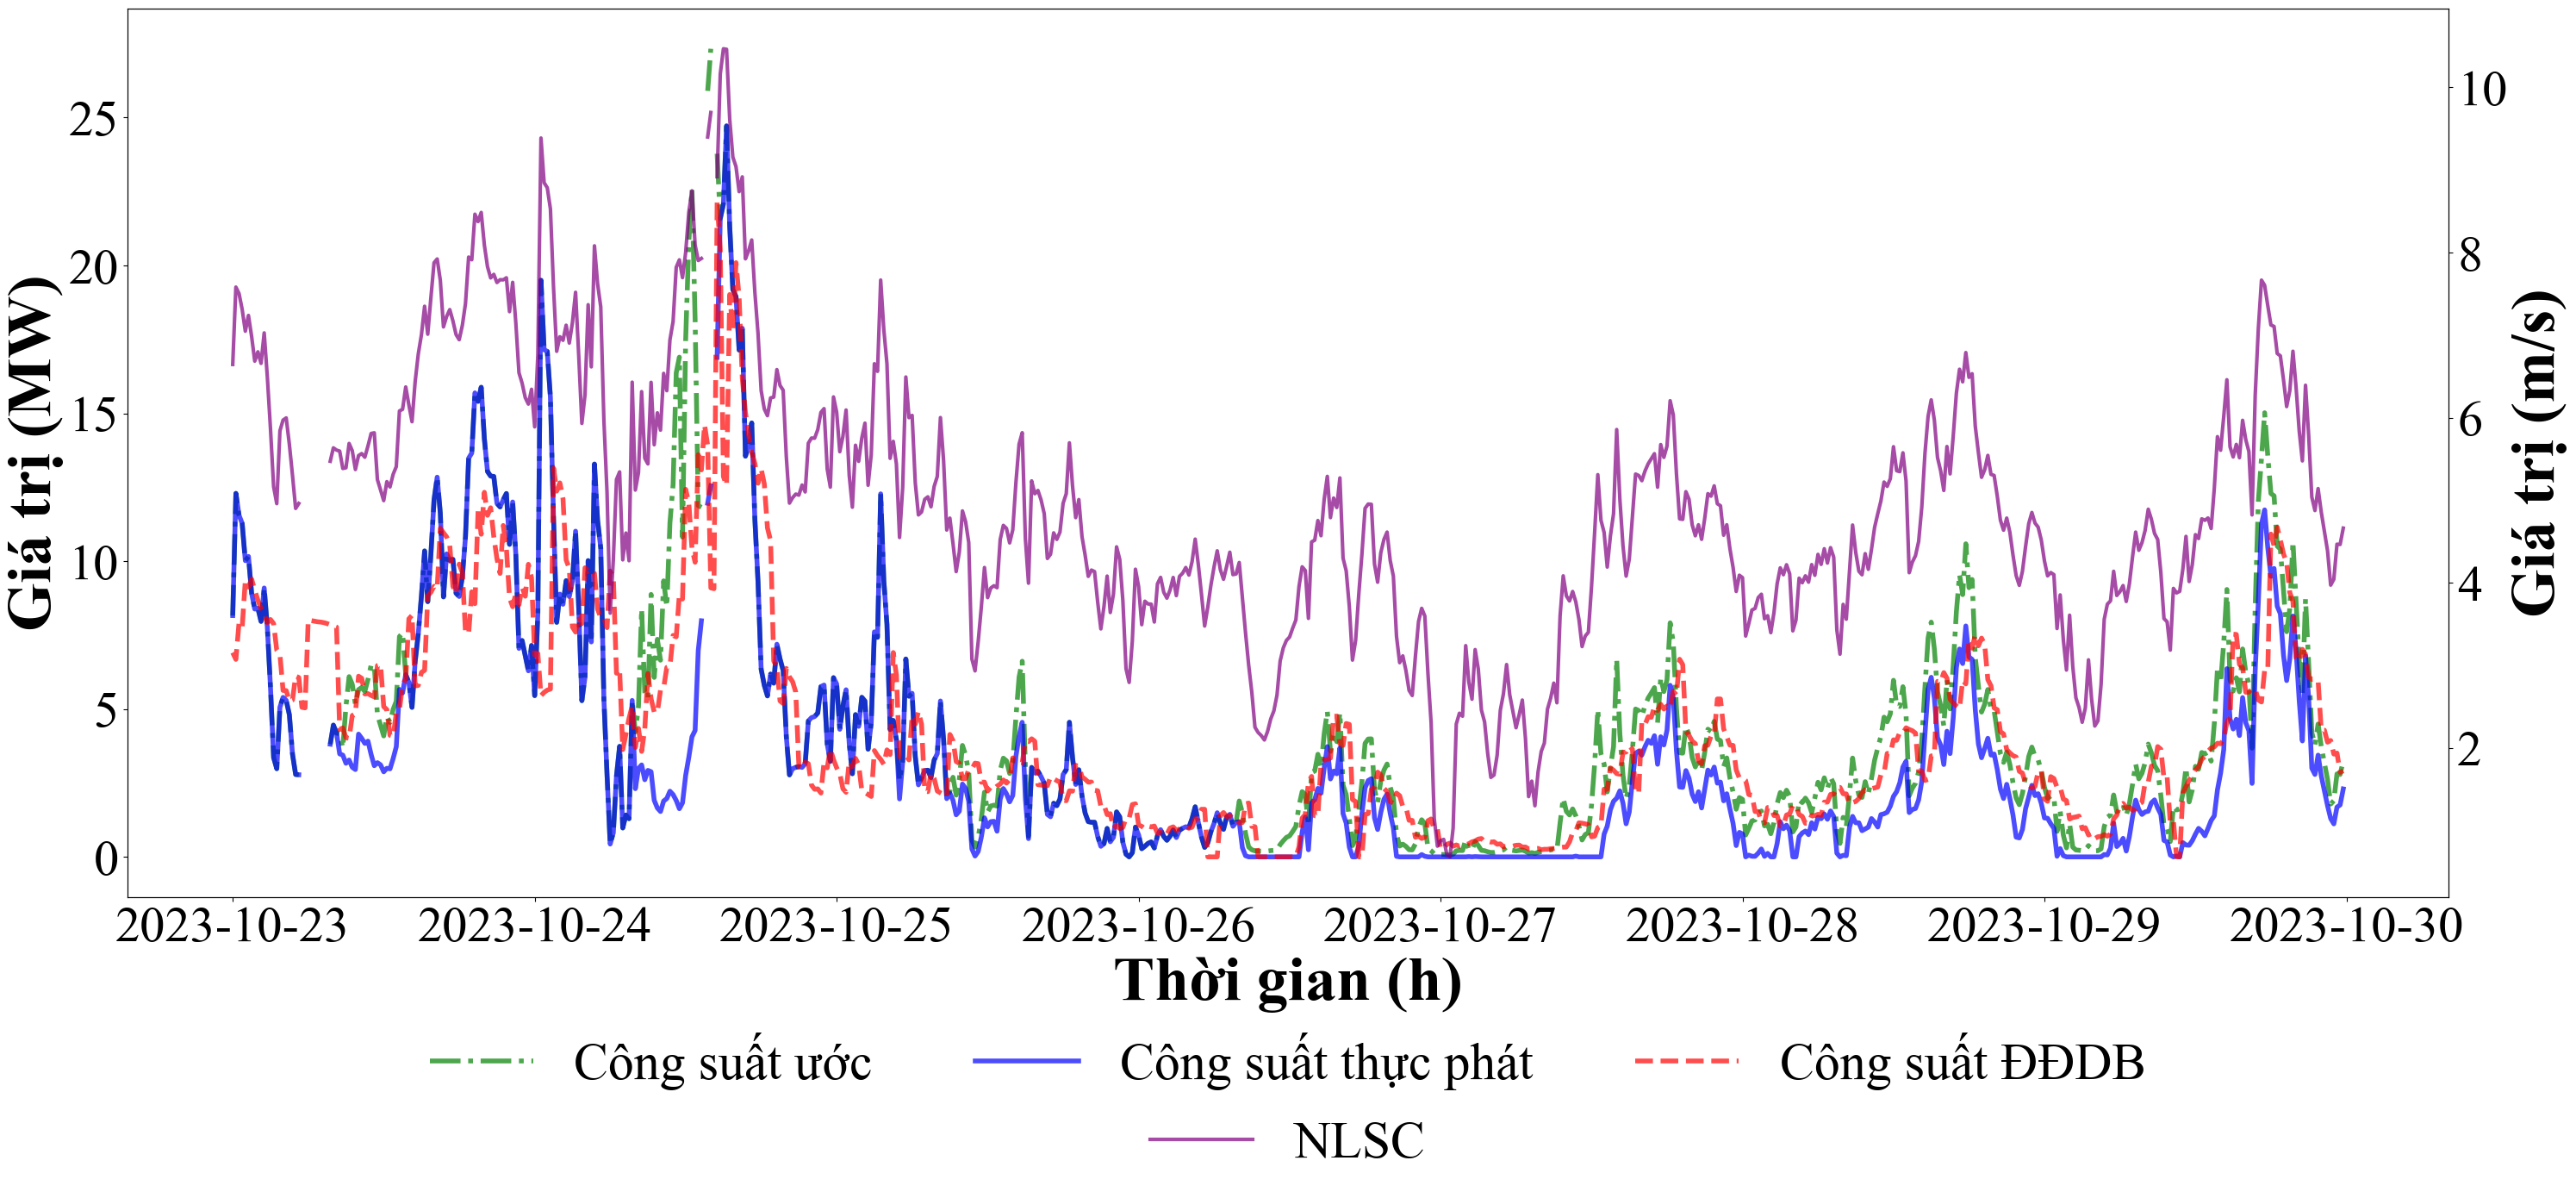

In [39]:
HL1_DB = data2[data2['ID'] == 231][['Time', 'NLSC', 'P_real', 'P_uoc']]
HL2_DB = data2[data2['ID'] == 220][['Time', 'NLSC', 'P_real', 'P_uoc']]
HL3_DB = data2[data2['ID'] == 569][['Time', 'NLSC', 'P_real', 'P_uoc']]

HL1_NLSC = HL1_DB[['Time', 'NLSC']]
HL1_NLSC['Time']=pd.to_datetime(HL1_NLSC['Time'])
HL1_NLSC_resampled=HL1_NLSC.resample('15T', on='Time').mean()
HL1_Puoc= HL1_DB[['Time','P_uoc']]
HL1_Puoc_resampled=HL1_Puoc.resample('15T', on='Time').mean()
HL1_Puoc.set_index('Time', inplace=True)
HL1_Preal= HL1_DB[['Time','P_real']]
HL1_Preal_resampled=HL1_Preal.resample('15T', on='Time').mean()
HL1_Preal.set_index('Time', inplace=True)
print(HL1_NLSC_resampled.shape,HL1_Puoc_resampled.shape)

# HL1_DDDB.set_index('Time', inplace = True)

# Lấy dữ liệu từ các cột
column1 = HL1_NLSC_resampled['NLSC'][:672].values
column2 = HL1_Puoc_resampled['P_uoc'][:672].values
column3 = HL1_DDDB['CS ĐĐDB']
column4 = HL1_Preal_resampled['P_real'][:672].values
HL1_SS = pd.DataFrame({'NLSC': column1, 'P_uoc': column2, 'CS ĐĐDB': column3,'P_real':column4})
print(HL1_SS)


fig, ax1 = plt.subplots(figsize=(30, 15))
# Vẽ dữ liệu trên trục chính
# ax1.plot(HL1_SS['NLSC'], label='NLSC',linestyle='-', color='blue', alpha=0.7, linewidth=4)
ax1.plot(HL1_SS['P_uoc'], label='Công suất ước', linestyle='-.', color='green', alpha=0.7, linewidth=4)
ax1.plot(HL1_SS['P_real'], label='Công suất thực phát', linestyle='-', color='blue', alpha=0.7, linewidth=4)
ax1.plot(HL1_SS['CS ĐĐDB'], label='Công suất ĐĐDB', linestyle='--', color='red', alpha=0.7, linewidth=4)

# Thiết lập trục chính
ax1.set_xlabel('Thời gian (h)', fontname='Times New Roman', fontsize=52, fontweight='bold')
ax1.set_ylabel('Giá trị (MW)', fontname='Times New Roman', fontsize=52, fontweight='bold')

# Thiết lập font cho nhãn trục
ax1.tick_params(axis='both', which='major', labelsize=42)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontname('Times New Roman')

# Tạo trục phụ
ax2 = ax1.twinx()

# Vẽ dữ liệu trên trục phụ
ax2.plot(HL1_SS['NLSC'], label='NLSC', linestyle='-', color='purple',alpha=0.7, linewidth=3)
ax2.set_ylabel('Giá trị (m/s)', fontname='Times New Roman', fontsize=52, fontweight='bold')

# Thiết lập font cho nhãn trục phụ
ax2.tick_params(axis='both', which='major', labelsize=42)
for label in ax2.get_yticklabels():
    label.set_fontname('Times New Roman')

# Đặt vị trí cho hình chú thích (legend)
ax1.legend(prop={'size': 43, 'family': 'Times New Roman'}, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=43)
ax2.legend(prop={'size': 43, 'family': 'Times New Roman'}, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False, fontsize=43)

# Điều chỉnh layout để làm cho hình chú thích và nhãn trục vừa vặn
plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.show()

C:\Users\namnvn\AppData\Local\Temp\ipykernel_19504\2507974828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HL2_NLSC['Time']=pd.to_datetime(HL2_NLSC['Time'])


(673, 1) (673, 1)
                         NLSC     P_uoc  CS ĐĐDB    P_real
Time                                                      
2023-10-23 00:00:00  5.659375  5.697406    7.837  5.697406
2023-10-23 00:15:00  6.304167  8.037145    7.492  8.037145
2023-10-23 00:30:00  6.329167  8.337782    7.001  8.337782
2023-10-23 00:45:00  5.736981  6.566735    6.836  6.566735
2023-10-23 01:00:00  5.877084  6.502934    7.469  6.502934
...                       ...       ...      ...       ...
2023-10-29 22:45:00  3.209377  7.991357    8.772  7.991357
2023-10-29 23:00:00  3.198960  7.864515    8.702  7.864515
2023-10-29 23:15:00  3.431251  8.187261    8.625  8.187261
2023-10-29 23:30:00  3.408333  8.161389    8.258  8.161389
2023-10-29 23:45:00  3.540625  8.234096    8.177  8.234096

[672 rows x 4 columns]


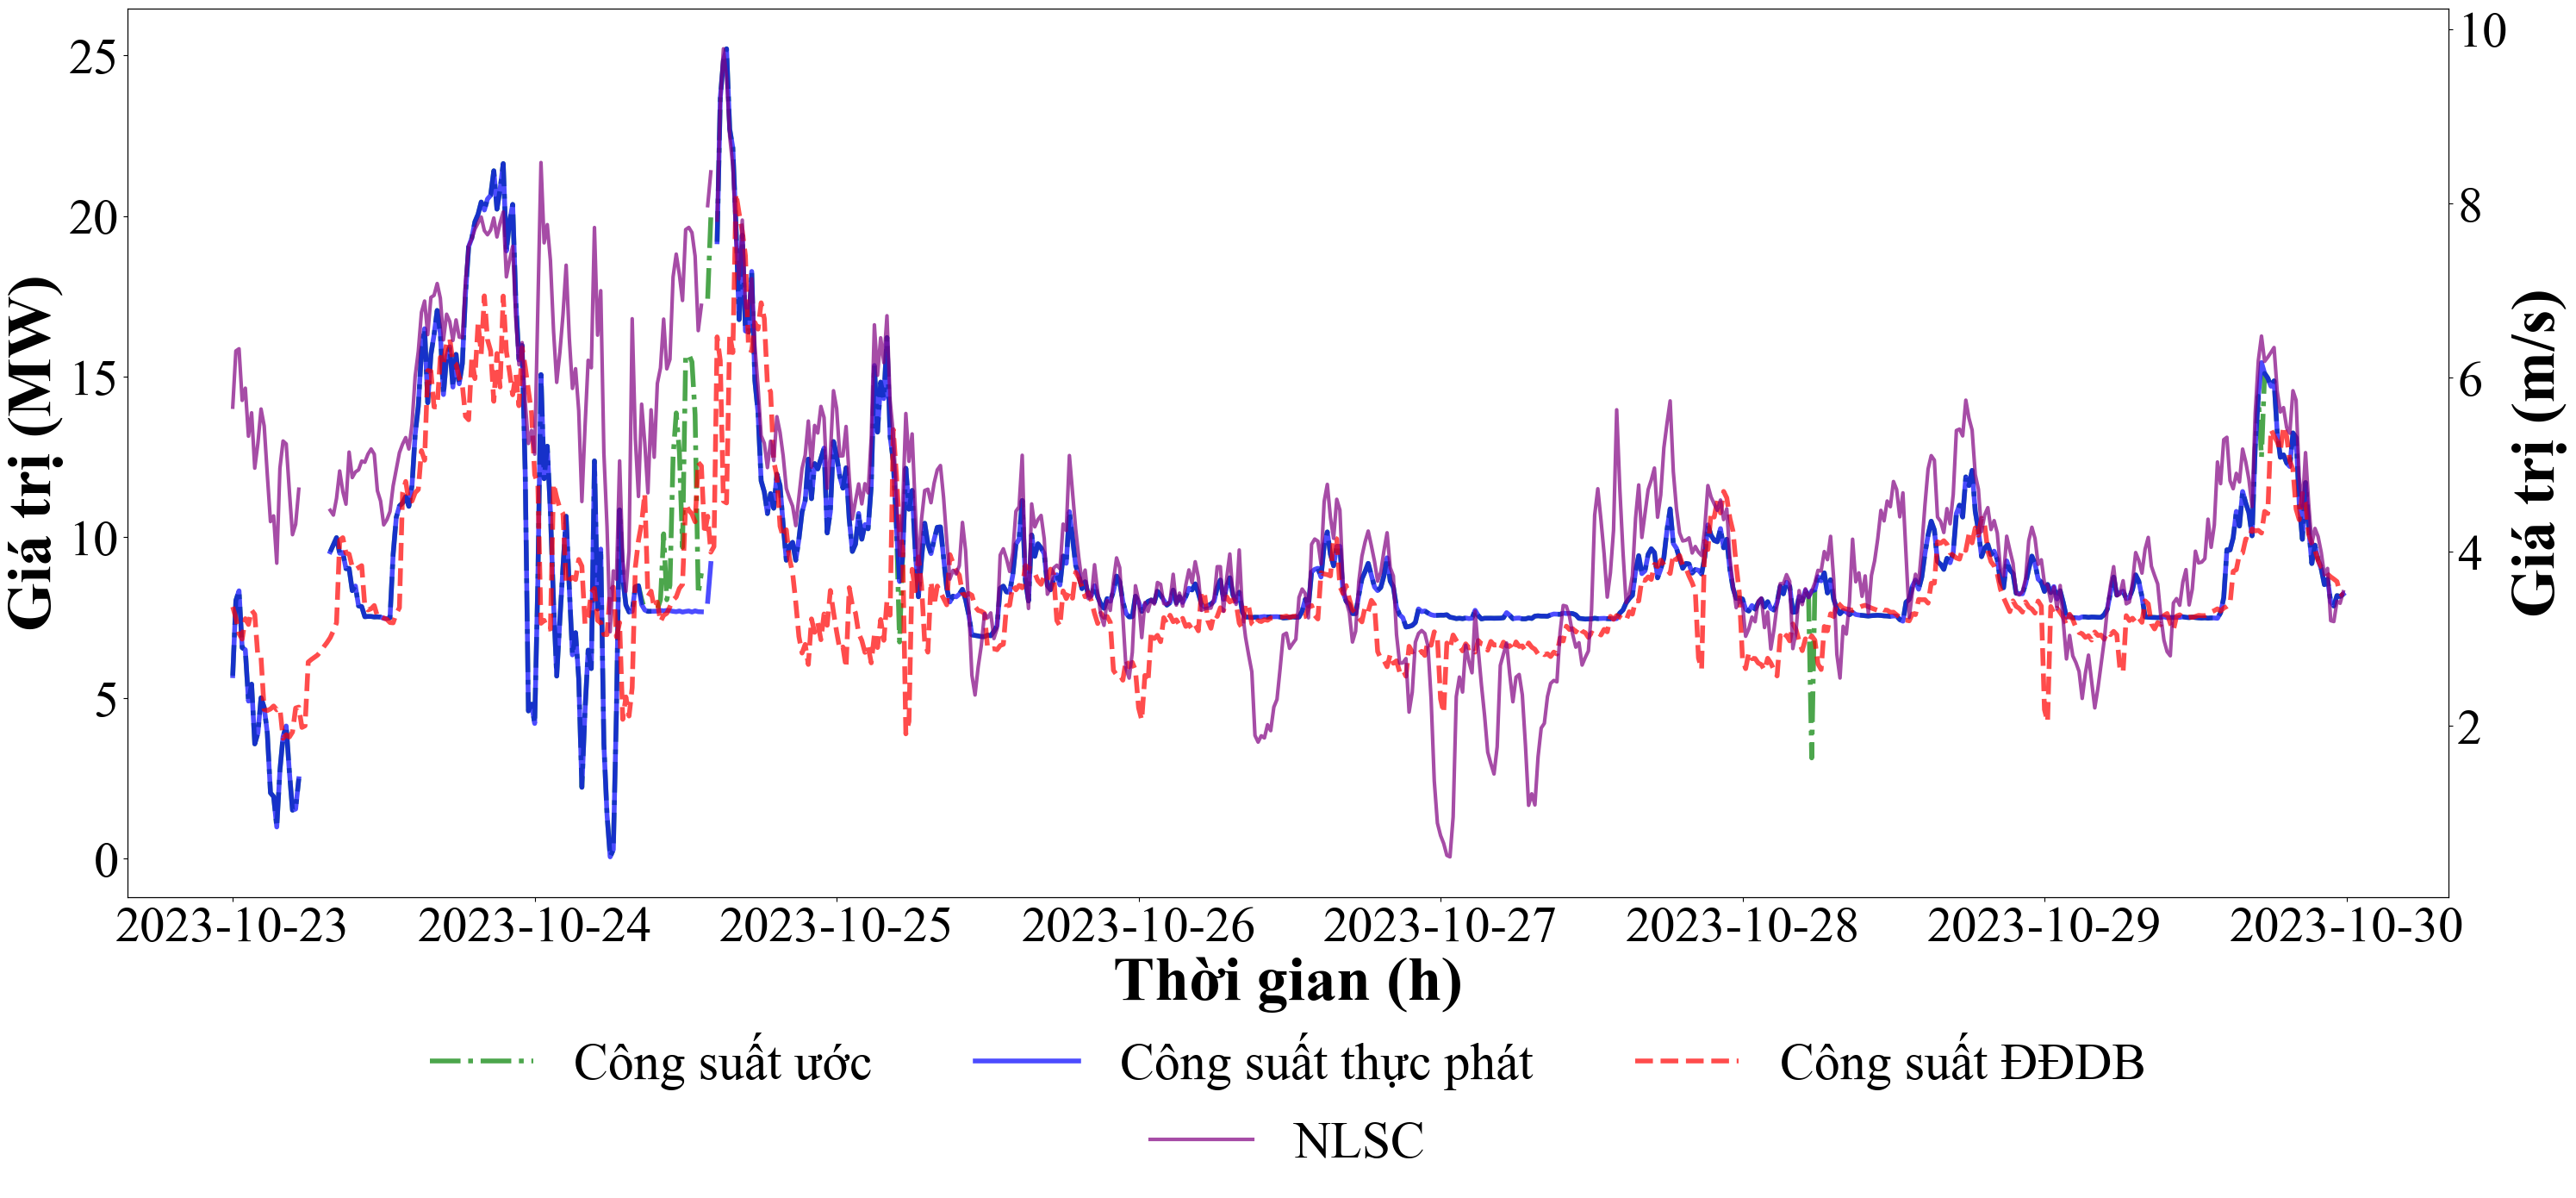

C:\Users\namnvn\AppData\Local\Temp\ipykernel_19504\2507974828.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HL3_NLSC['Time']=pd.to_datetime(HL3_NLSC['Time'])


(673, 1) (673, 1)
                         NLSC      P_uoc  CS ĐĐDB     P_real
Time                                                        
2023-10-23 00:00:00  8.100000  14.972333   17.046  14.972333
2023-10-23 00:15:00  8.633333  15.417600   16.581  15.417600
2023-10-23 00:30:00  8.900000  17.713467   14.563  17.713467
2023-10-23 00:45:00  8.466667  16.676600   14.210  16.676600
2023-10-23 01:00:00  8.800000  17.876767   15.362  17.876767
...                       ...        ...      ...        ...
2023-10-29 22:45:00  3.500000   1.348267    3.914   1.286400
2023-10-29 23:00:00  3.500000   1.217200    2.924   1.112333
2023-10-29 23:15:00  3.500000   1.479600    3.056   1.466933
2023-10-29 23:30:00  3.500000   1.366933    2.764   1.319400
2023-10-29 23:45:00  3.500000   1.768433    2.861   1.768433

[672 rows x 4 columns]


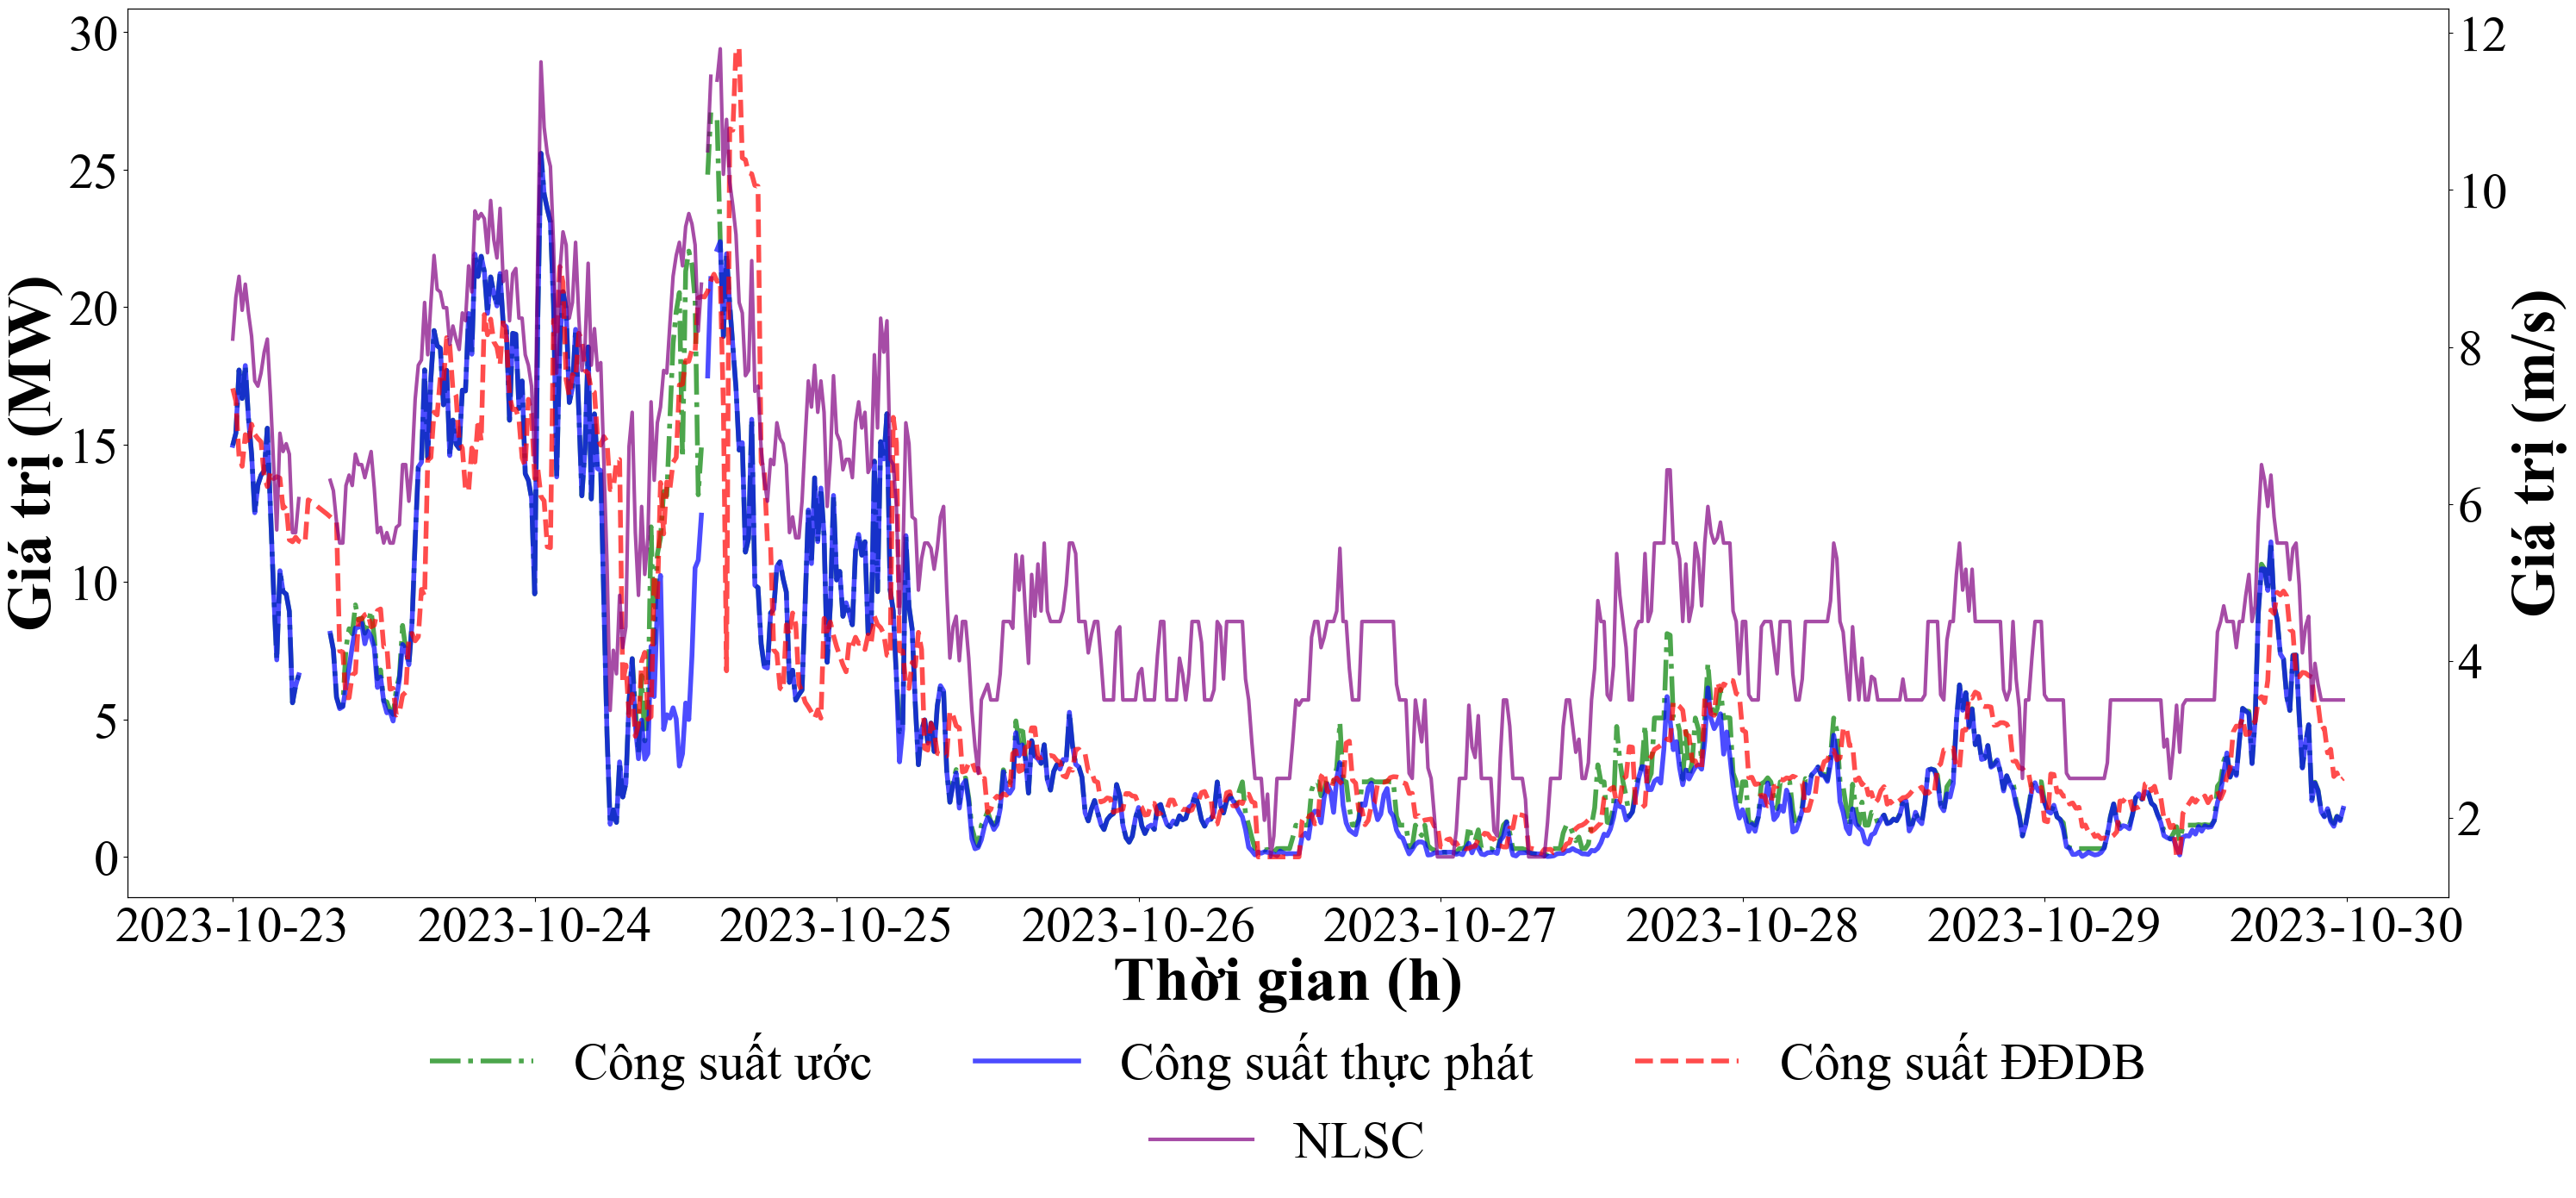

In [40]:
HL2_NLSC = HL2_DB[['Time', 'NLSC']]
HL2_NLSC['Time']=pd.to_datetime(HL2_NLSC['Time'])
HL2_NLSC_resampled=HL2_NLSC.resample('15T', on='Time').mean()
HL2_Puoc= HL2_DB[['Time','P_uoc']]
HL2_Puoc_resampled=HL2_Puoc.resample('15T', on='Time').mean()
HL2_Puoc.set_index('Time', inplace=True)
HL2_Preal= HL2_DB[['Time','P_real']]
HL2_Preal_resampled=HL2_Preal.resample('15T', on='Time').mean()
HL2_Preal.set_index('Time', inplace=True)
print(HL2_NLSC_resampled.shape,HL2_Puoc_resampled.shape)


# Lấy dữ liệu từ các cột
column1 = HL2_NLSC_resampled['NLSC'][:672].values
column2 = HL2_Puoc_resampled['P_uoc'][:672].values
column3 = HL2_DDDB['CS ĐĐDB']
column4 = HL2_Preal_resampled['P_real'][:672].values
HL2_SS = pd.DataFrame({'NLSC': column1, 'P_uoc': column2, 'CS ĐĐDB': column3,'P_real':column4})
print(HL2_SS)

fig, ax1 = plt.subplots(figsize=(30, 15))
# Vẽ dữ liệu trên trục chính
# ax1.plot(HL2_SS['NLSC'], label='NLSC',linestyle='-', color='blue', alpha=0.7, linewidth=4)
ax1.plot(HL2_SS['P_uoc'], label='Công suất ước', linestyle='-.', color='green', alpha=0.7, linewidth=4)
ax1.plot(HL2_SS['P_real'], label='Công suất thực phát', linestyle='-', color='blue', alpha=0.7, linewidth=4)
ax1.plot(HL2_SS['CS ĐĐDB'], label='Công suất ĐĐDB', linestyle='--', color='red', alpha=0.7, linewidth=4)

# Thiết lập trục chính
ax1.set_xlabel('Thời gian (h)', fontname='Times New Roman', fontsize=52, fontweight='bold')
ax1.set_ylabel('Giá trị (MW)', fontname='Times New Roman', fontsize=52, fontweight='bold')

# Thiết lập font cho nhãn trục
ax1.tick_params(axis='both', which='major', labelsize=42)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontname('Times New Roman')

# Tạo trục phụ
ax2 = ax1.twinx()

# Vẽ dữ liệu trên trục phụ
ax2.plot(HL2_SS['NLSC'], label='NLSC', linestyle='-', color='purple',alpha=0.7, linewidth=3)
ax2.set_ylabel('Giá trị (m/s)', fontname='Times New Roman', fontsize=52, fontweight='bold')

# Thiết lập font cho nhãn trục phụ
ax2.tick_params(axis='both', which='major', labelsize=42)
for label in ax2.get_yticklabels():
    label.set_fontname('Times New Roman')

# Đặt vị trí cho hình chú thích (legend)
ax1.legend(prop={'size': 43, 'family': 'Times New Roman'}, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=43)
ax2.legend(prop={'size': 43, 'family': 'Times New Roman'}, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False, fontsize=43)

# Điều chỉnh layout để làm cho hình chú thích và nhãn trục vừa vặn
plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.show()

HL3_NLSC = HL3_DB[['Time', 'NLSC']]
HL3_NLSC['Time']=pd.to_datetime(HL3_NLSC['Time'])
HL3_NLSC_resampled=HL3_NLSC.resample('15T', on='Time').mean()
HL3_Puoc= HL3_DB[['Time','P_uoc']]
HL3_Puoc_resampled=HL3_Puoc.resample('15T', on='Time').mean()
HL3_Puoc.set_index('Time', inplace=True)
HL3_Preal= HL3_DB[['Time','P_real']]
HL3_Preal_resampled=HL3_Preal.resample('15T', on='Time').mean()
HL3_Preal.set_index('Time', inplace=True)
print(HL3_NLSC_resampled.shape,HL3_Puoc_resampled.shape)


# Lấy dữ liệu từ các cột
column1 = HL3_NLSC_resampled['NLSC'][:672].values
column2 = HL3_Puoc_resampled['P_uoc'][:672].values
column3 = HL3_DDDB['CS ĐĐDB']
column4 = HL3_Preal_resampled['P_real'][:672].values
HL3_SS = pd.DataFrame({'NLSC': column1, 'P_uoc': column2, 'CS ĐĐDB': column3,'P_real':column4})
print(HL3_SS)

fig, ax1 = plt.subplots(figsize=(30, 15))
# Vẽ dữ liệu trên trục chính
# ax1.plot(HL3_SS['NLSC'], label='NLSC',linestyle='-', color='blue', alpha=0.7, linewidth=4)
ax1.plot(HL3_SS['P_uoc'], label='Công suất ước', linestyle='-.', color='green', alpha=0.7, linewidth=4)
ax1.plot(HL3_SS['P_real'], label='Công suất thực phát', linestyle='-', color='blue', alpha=0.7, linewidth=4)
ax1.plot(HL3_SS['CS ĐĐDB'], label='Công suất ĐĐDB', linestyle='--', color='red', alpha=0.7, linewidth=4)

# Thiết lập trục chính
ax1.set_xlabel('Thời gian (h)', fontname='Times New Roman', fontsize=52, fontweight='bold')
ax1.set_ylabel('Giá trị (MW)', fontname='Times New Roman', fontsize=52, fontweight='bold')

# Thiết lập font cho nhãn trục
ax1.tick_params(axis='both', which='major', labelsize=42)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontname('Times New Roman')

# Tạo trục phụ
ax2 = ax1.twinx()

# Vẽ dữ liệu trên trục phụ
ax2.plot(HL3_SS['NLSC'], label='NLSC', linestyle='-', color='purple',alpha=0.7, linewidth=3)
ax2.set_ylabel('Giá trị (m/s)', fontname='Times New Roman', fontsize=52, fontweight='bold')

# Thiết lập font cho nhãn trục phụ
ax2.tick_params(axis='both', which='major', labelsize=42)
for label in ax2.get_yticklabels():
    label.set_fontname('Times New Roman')

# Đặt vị trí cho hình chú thích (legend)
ax1.legend(prop={'size': 43, 'family': 'Times New Roman'}, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=43)
ax2.legend(prop={'size': 43, 'family': 'Times New Roman'}, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False, fontsize=43)

# Điều chỉnh layout để làm cho hình chú thích và nhãn trục vừa vặn
plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.show()

In [25]:
def calculate_daily_sum(data):
    # Chuyển cột 'Time' sang định dạng ngày tháng
    data['Time'] = pd.to_datetime(data['Time'])
    
    # Resample dữ liệu thành khoảng thời gian 15 phút và tính tổng cho mỗi khoảng 15 phút
    data_resampled = data.resample('15T', on='Time').mean()
    
    # Group dữ liệu đã resample theo ngày và tính tổng
    daily_sum = data_resampled.groupby(data_resampled.index.date).agg({
        'P_real': 'sum',
        'P_uoc': 'sum'
    }) / 4  # Chia cho 4 để có tổng hàng ngày
    # Chuyển cột 'Time' thành một cột khác
    daily_sum.reset_index(inplace=True)
    return daily_sum

# Áp dụng hàm tính tổng cho 3 đối tượng
HL1_daily_sum = calculate_daily_sum(HL1_DB)
HL2_daily_sum = calculate_daily_sum(HL2_DB)
HL3_daily_sum = calculate_daily_sum(HL3_DB)
HL1_daily_sum.loc[HL1_daily_sum['P_uoc'] < HL1_daily_sum['P_real'], 'P_uoc'] = HL1_daily_sum['P_real']
HL2_daily_sum.loc[HL2_daily_sum['P_uoc'] < HL2_daily_sum['P_real'], 'P_uoc'] = HL2_daily_sum['P_real']
HL3_daily_sum.loc[HL3_daily_sum['P_uoc'] < HL3_daily_sum['P_real'], 'P_uoc'] = HL3_daily_sum['P_real']
print("HL1 Daily Sum:")
print(HL1_daily_sum)

print("\nHL2 Daily Sum:")
print(HL2_daily_sum)

print("\nHL3 Daily Sum:")
print(HL3_daily_sum)

HL1 Daily Sum:
        index      P_real       P_uoc
0  2023-10-23  167.222633  176.895987
1  2023-10-24  175.680076  229.877703
2  2023-10-25   68.218859   74.060750
3  2023-10-26   20.369850   32.533203
4  2023-10-27   28.733509   53.465032
5  2023-10-28   49.747829   85.028414
6  2023-10-29   62.239404   97.216739
7  2023-10-30    0.599982    0.789375

HL2 Daily Sum:
        index      P_real       P_uoc
0  2023-10-23  242.431603  242.431603
1  2023-10-24  240.649469  259.091172
2  2023-10-25  225.777440  225.777440
3  2023-10-26  194.602116  194.602116
4  2023-10-27  196.640670  196.650490
5  2023-10-28  206.503091  206.503091
6  2023-10-29  218.649390  218.649390
7  2023-10-30    2.038572    2.038572

HL3 Daily Sum:
        index      P_real       P_uoc
0  2023-10-23  281.032233  283.304692
1  2023-10-24  264.895751  309.267717
2  2023-10-25  110.289942  112.018803
3  2023-10-26   28.674683   37.371333
4  2023-10-27   36.379850   51.917567
5  2023-10-28   54.663992   60.869217
6  

In [ ]:
# # Vẽ các đối tượng từ dữ liệu HL1
# plt.figure(figsize=(20,10))
# plt.plot(HL1_NLSC['Time'], HL1_NLSC['NLSC'], label='HL1_NLSC (m/s)')
# plt.plot(HL1_Preal['Time'], HL1_Preal['P_real'], label='HL1_P_real(MW)')
# plt.plot(HL1_Puoc['Time'], HL1_Puoc['P_uoc'], label='HL1_Puoc(MW)')

# # Vẽ các đối tượng từ dữ liệu HL2
# plt.plot(HL2_NLSC['Time'], HL2_NLSC['NLSC'], label='HL2_NLSC (m/s)')
# plt.plot(HL2_Preal['Time'], HL2_Preal['P_real'], label='HL2_P_real(MW)')
# plt.plot(HL2_Puoc['Time'], HL2_Puoc['P_uoc'], label='HL2_Puoc(MW)')

# # Vẽ các đối tượng từ dữ liệu HL3
# plt.plot(HL3_NLSC['Time'], HL3_NLSC['NLSC'], label='HL3_NLSC (m/s)')
# plt.plot(HL3_Preal['Time'], HL3_Preal['P_real'], label='HL3_P_real(MW)')
# plt.plot(HL3_Puoc['Time'], HL3_Puoc['P_uoc'], label='HL3_Puoc(MW)')

# plt.legend()
# plt.show()


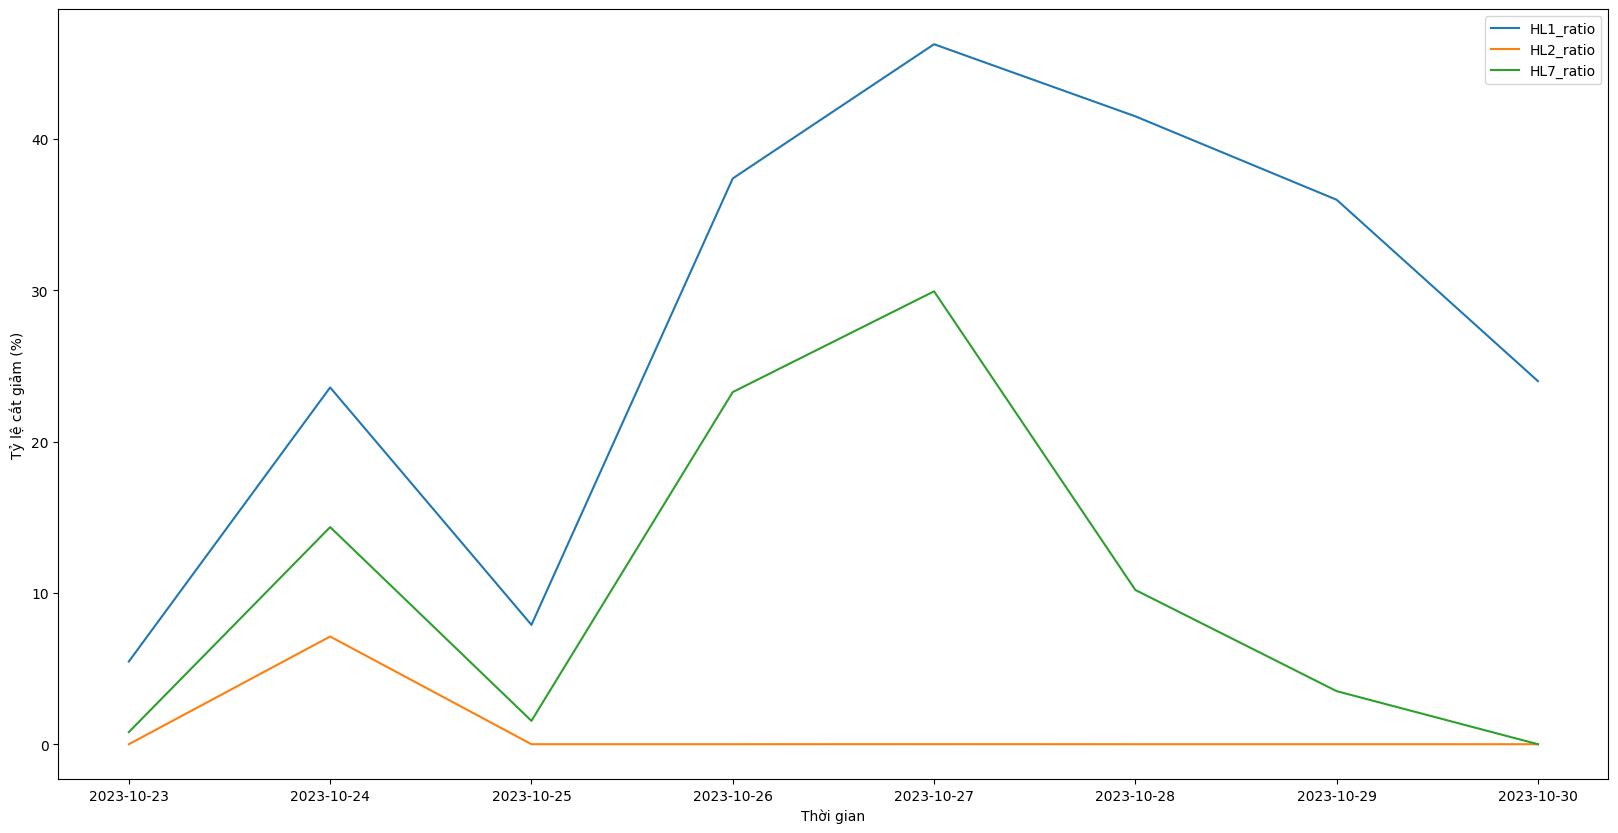

In [29]:
# Tính tỷ lệ P_real/P_uoc cho 3 đối tượng
HL1_daily_sum['P_ratio'] = (1-HL1_daily_sum['P_real'] / HL1_daily_sum['P_uoc']) * 100
HL2_daily_sum['P_ratio'] = (1-HL2_daily_sum['P_real'] / HL2_daily_sum['P_uoc']) * 100
HL3_daily_sum['P_ratio'] = (1-HL3_daily_sum['P_real'] / HL3_daily_sum['P_uoc']) * 100

# Vẽ biểu đồ
plt.figure(figsize=(20,10))
plt.plot(HL1_daily_sum['index'], HL1_daily_sum['P_ratio'], label='HL1_ratio')
plt.plot(HL2_daily_sum['index'], HL2_daily_sum['P_ratio'], label='HL2_ratio')
plt.plot(HL3_daily_sum['index'], HL3_daily_sum['P_ratio'], label='HL7_ratio')
plt.xlabel('Thời gian')
plt.ylabel('Tỷ lệ cắt giảm (%)')
plt.legend()
plt.show()

In [30]:
# Tạo một DataFrame từ các biến ban đầu
catgiam = pd.DataFrame({
    'HL1_P_ratio': (1 - HL1_daily_sum['P_real'] / HL1_daily_sum['P_uoc']) * 100,
    'HL2_P_ratio': (1 - HL2_daily_sum['P_real'] / HL2_daily_sum['P_uoc']) * 100,
    'HL3_P_ratio': (1 - HL3_daily_sum['P_real'] / HL3_daily_sum['P_uoc']) * 100
})

# Hiển thị bảng kết quả
print(catgiam)

   HL1_P_ratio  HL2_P_ratio  HL3_P_ratio
0     5.468385     0.000000     0.802125
1    23.576722     7.117843    14.347429
2     7.887972     0.000000     1.543367
3    37.387506     0.000000    23.270912
4    46.257379     0.004994    29.927667
5    41.492701     0.000000    10.194357
6    35.978716     0.000000     3.507114
7    23.992716     0.000000     0.000000
